# Does Missingness Have A Pattern?

Analyzing the type of missingness in your dataset is a very important step towards treating missing values. In this chapter, you'll learn in detail how to establish patterns in your missing and non-missing data, and how to appropriately treat the missingness using simple techniques such as listwise deletion. 

## Is the data missing at random?

Missingness has a pattern, and often for a good reason.

### Possible reasons for missing data

* values simply missing at random instances or intervals in a variable
* values missing due to another variable
* values missing due to the *missingness* of the same or another variable

### Types of missingness

* Missing Completely at Random (MCAR)
* Missing at Random (MAR)
* Missing Not at Random (MNAR)

The missingness type informs the methodology you use to treat the missing data.

#### Missing Completely at Random (MCAR)

*Missingness has no relationship between any values, observed or missing.*

Example: students are absent from a class on any given day randomly for their own reasons.

MCAR means there *is not* a relationship with another variable.

In [2]:
import pandas as pd
import missingno as msno

from numpy.random import rand

## the data file provided by datacamp (pima-indians-diabetes-data.csv) and the
# one being used in the exercises (pima_indians_diabetes.csv) have different
# data and it throws off the examples
# diabetes = pd.read_csv("data/pima-indians-diabetes-data.csv")
diabetes = pd.read_csv("data/pima_indians_diabetes.csv")

<Axes: >

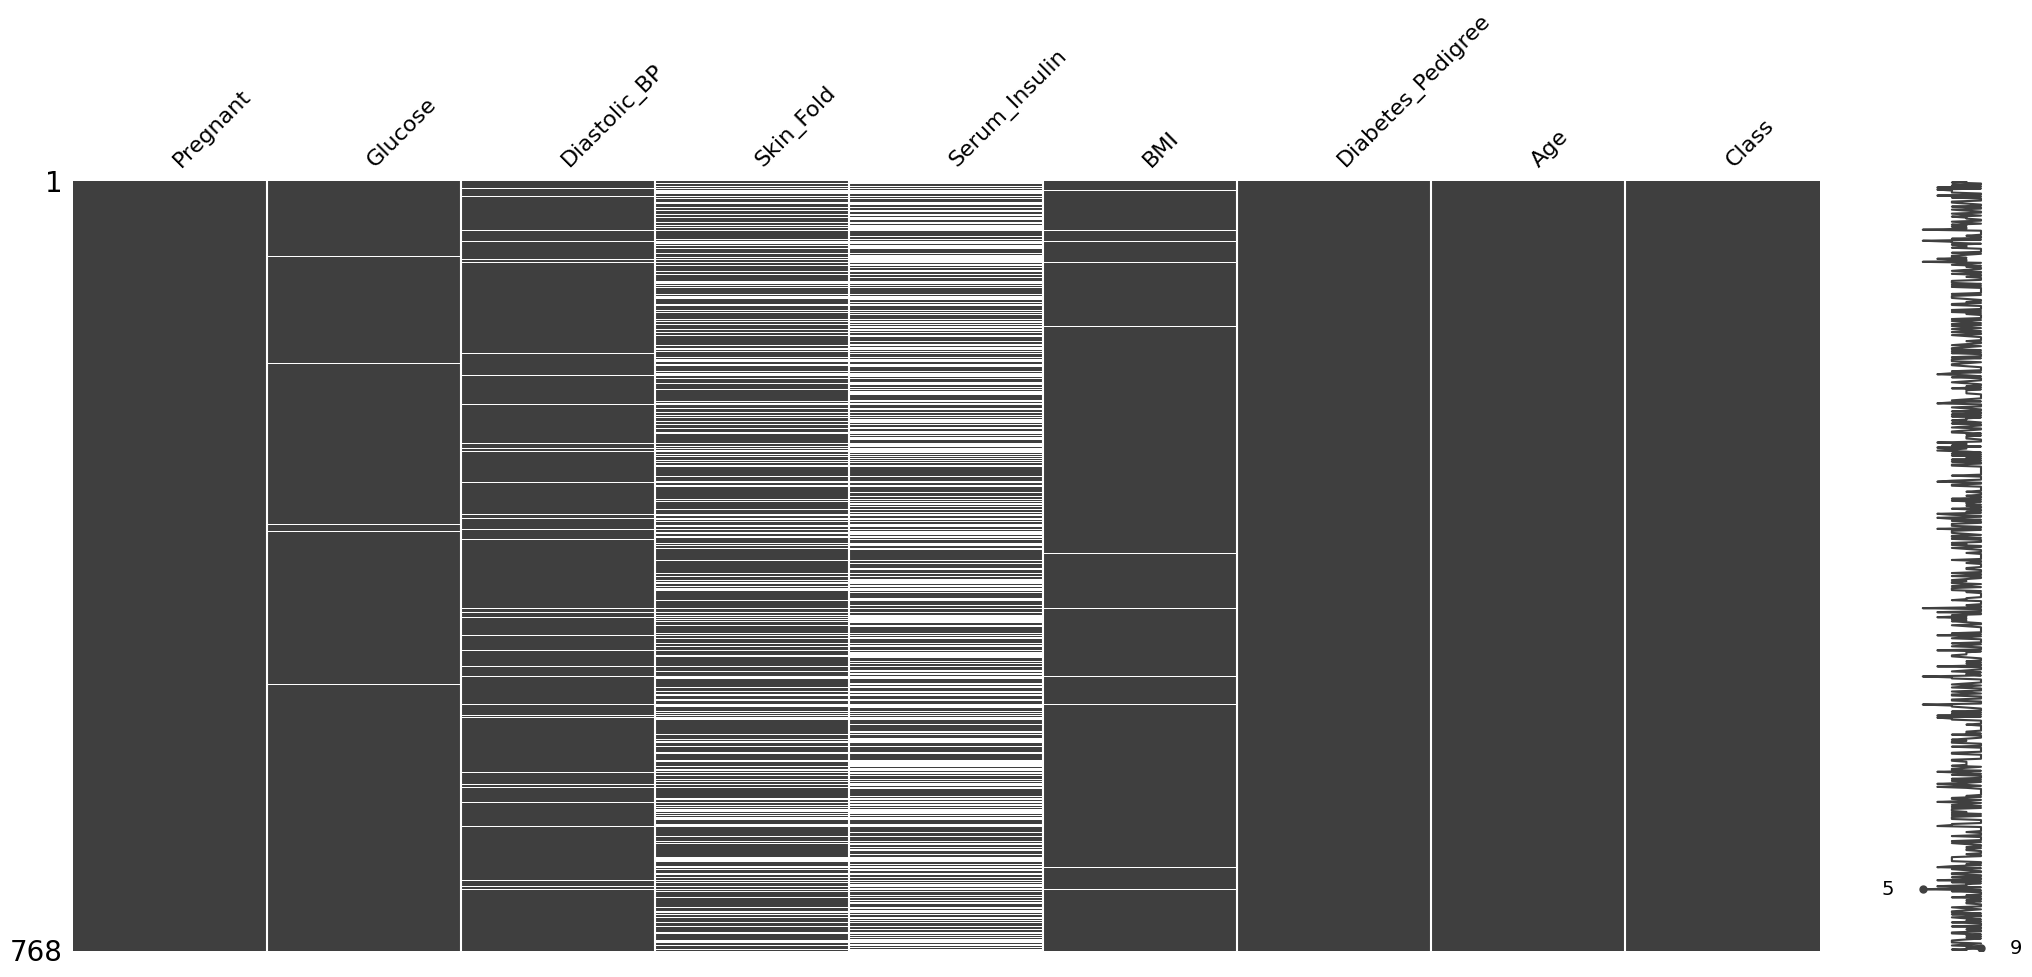

In [3]:
msno.matrix(diabetes)

The glucose column has values missing at random and does not have any correlation as no clear pattern exists.

This implies no dependency on any other variable, either present or absent.

#### Missing at Random (MAR)

*There is a systematic relationship between missingness and other observed data, but not the missing data (i.e., the missing data is missing because of some other observed variable but not itself).*

For example, students may be absent in winter due to bad weather. Although this may happen at random, there is a relationship between the variable (attendance) and another, unobserved variable (the season of the year).

MAR means there *might* exist a relationship with another variable.

<Axes: >

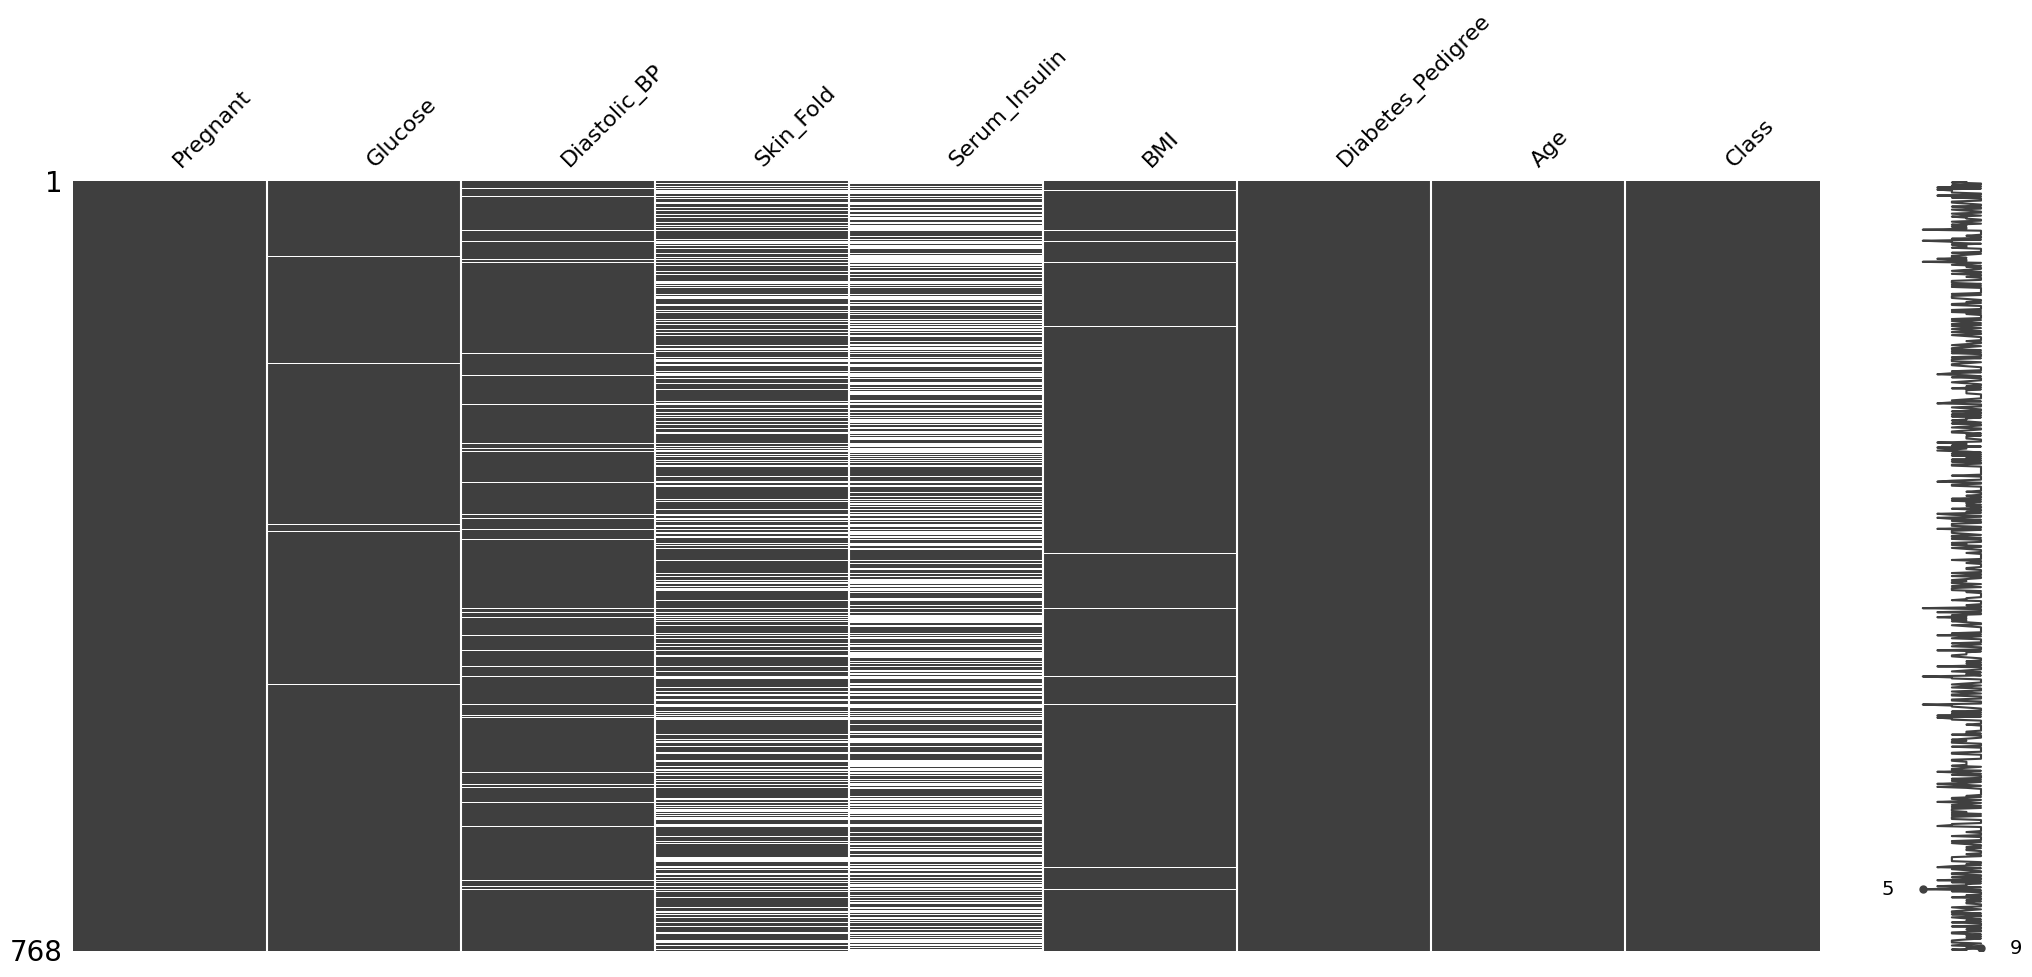

In [4]:
msno.matrix(diabetes)

Note that there are many missing values in the `Diastolic_BP` column. This is a typical case of MAR as there might be a reason for missingness that cannot be directly observed.

#### Missing Not at Random (MNAR)

*There is a relationship between missingness and its values, missing or non-missing.*

For example, in our class of students it is Sarah's birthday. Sarah and many of her friends are absent to attend her birthday party. This is not random as only Sarah and her friends are absent and all for the same reason.

<Axes: >

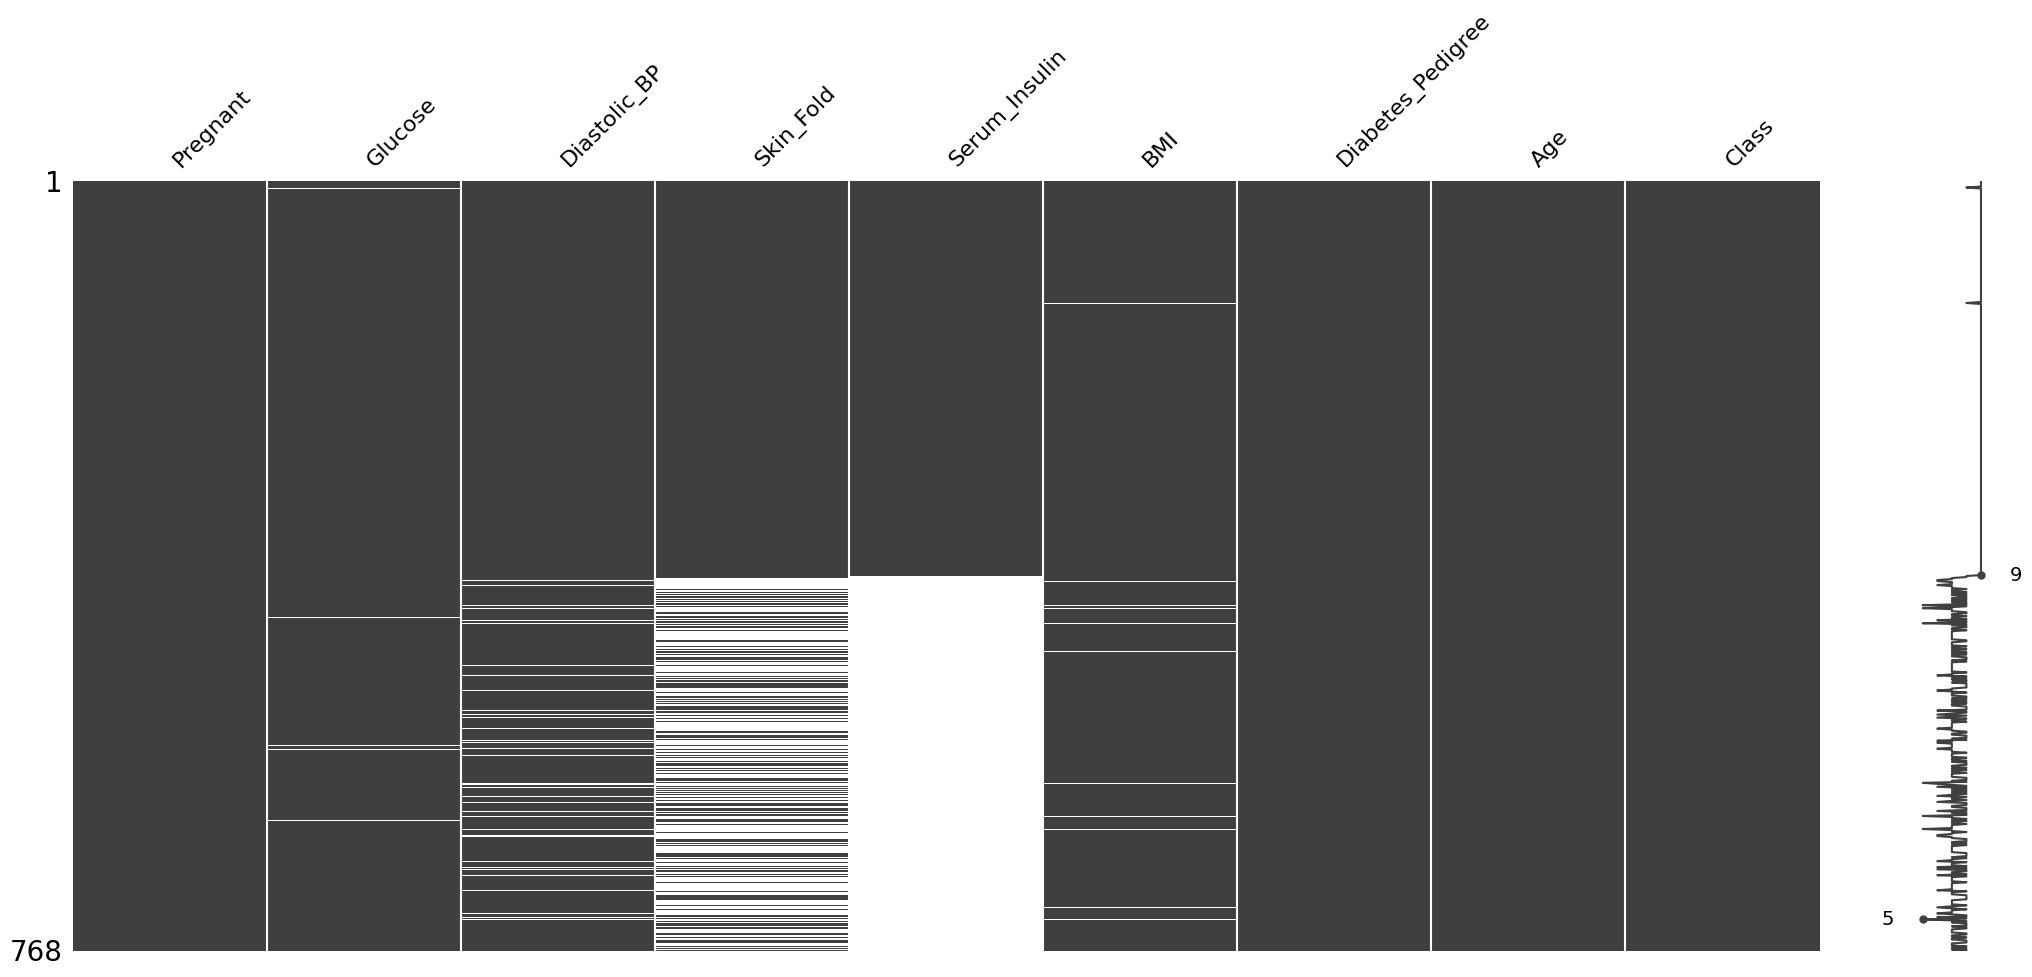

In [5]:
diabetes_sorted = diabetes.sort_values("Serum_Insulin")
msno.matrix(diabetes_sorted)

There is a strong correlation between the missingess of `Skin_Fold` and `Serum_Insulin` which is easily seen by sorting the dataframe on `Skin_Fold`.

#### Guess the missingness type

Analyzing the type of missingness helps you to deduce the best ways you can deal with missing data. The Pima Indians diabetes dataset is very popularly known for having missing data. Pima Indians is an ethnic group of people who are more prone to having diabetes. The dataset contains several lab tests conducted with members of this community.

In the video lesson, you learned the 3 types of missingness patterns. In this exercise you'll first visualize the missingness summary and then identify the types of missingness the DataFrame contains.

The DataFrame has already been loaded to you as `diabetes`.

##### Instructions 1/2

* Import the `missingno` package as `msno` and plot the missingness summary of `diabetes`.


<Axes: >

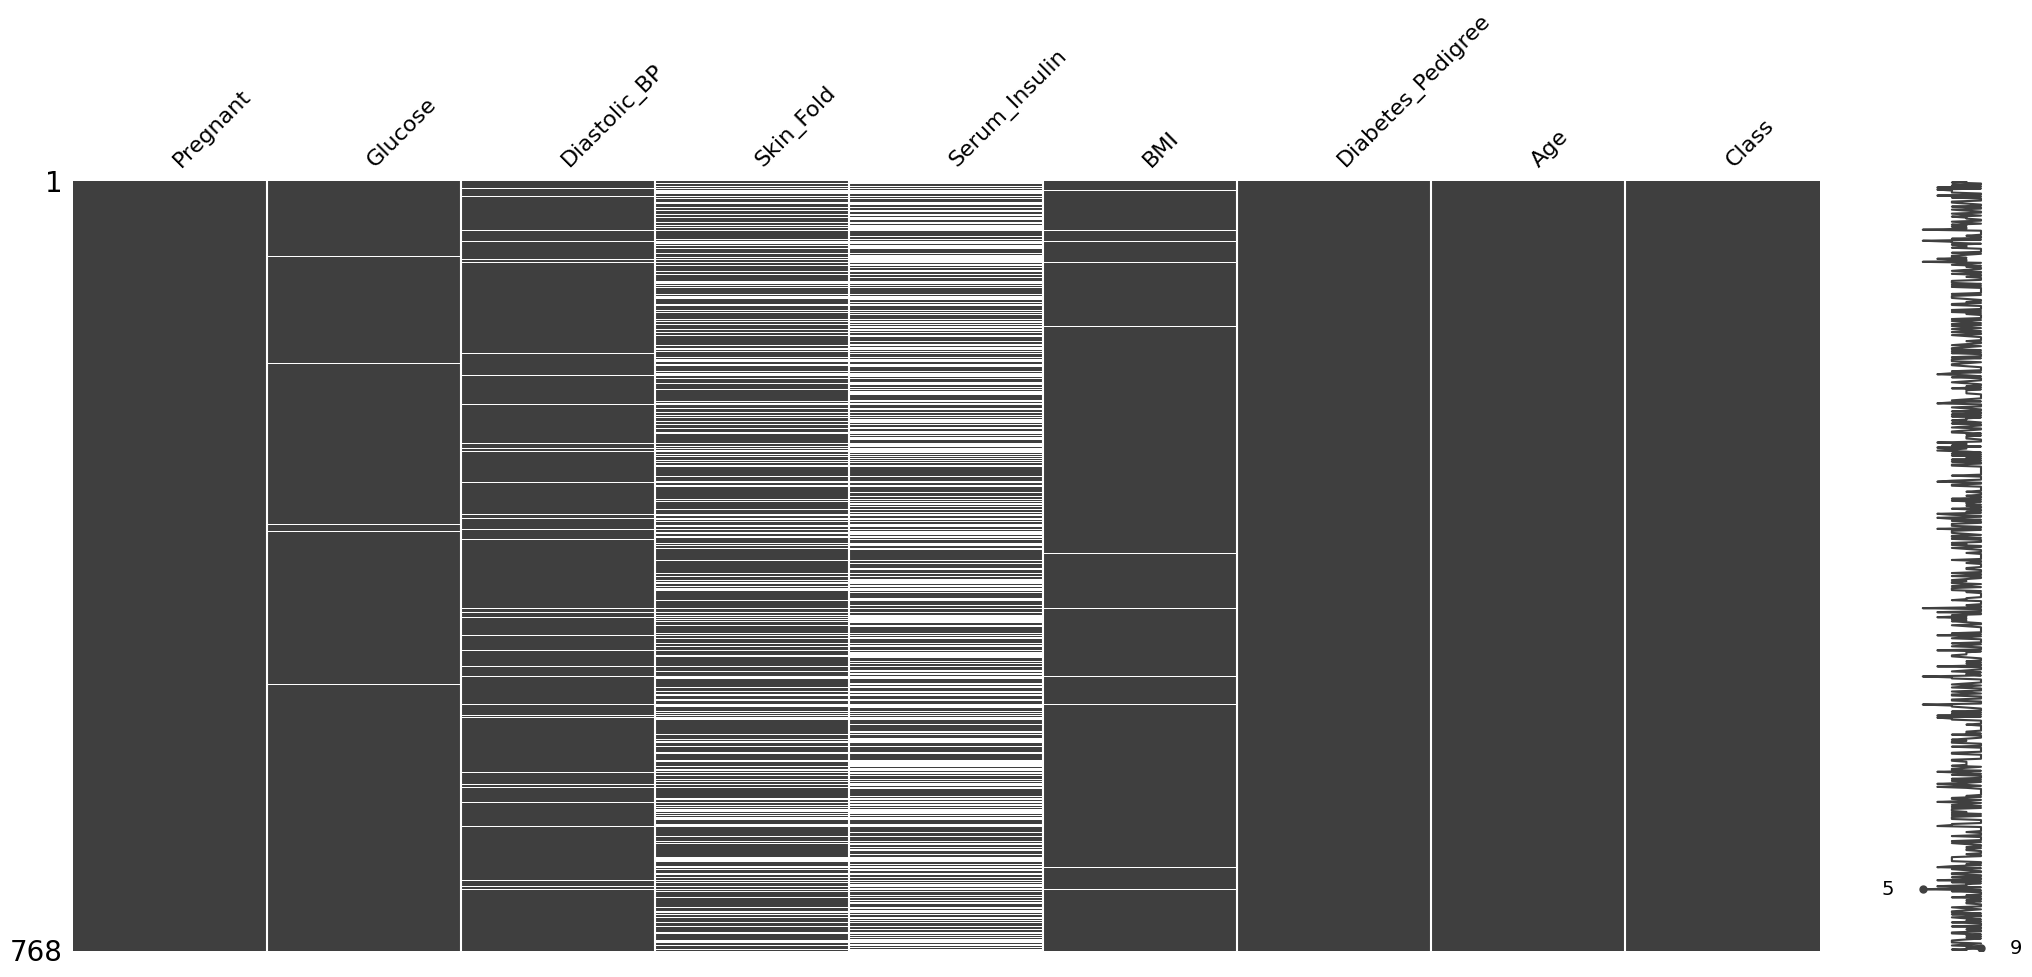

In [6]:
msno.matrix(diabetes)

##### Instructions 2/2

**Question**

Identify which of the following statements are **FALSE** given the `diabetes` data. Use the missingness summary a above which you just created. You can zoom into the image to properly visualize the missing data. Thoroughly read through each of the statements before answering.

1. `Glucose` is not missing at random.
2. `BMI` is missing completely at random.
3. `Serum_Insulin` is missing at random.
4. `Diastolic_BP` is missing at random.

**Possible answers**

1 and 2.
2 and 4.
1, 2 and 3.
1 and 3.

**Answer**

1 and 3.

Only a few missing values of `BMI` suggests that it might be missing completely at random! Moreover, `Diastolic_BP` appears to show a pattern.

#### Deduce MNAR

In the previous exercise, you worked on identifying the type of missing values given the missingness summary. In this exercise, you'll continue on that spree to affirmatively identify data that is *Missing Not at Random* (MNAR).

The missingness summary for the `diabetes` DataFrame is as above.

Your goal is to sort the `diabetes` DataFrame on `Serum_Insulin` and identify the correlation between `Skin_Fold` and `Serum_Insulin`.

##### Instructions

* Import the `missingno` package as `msno`.
* Sort the values of `Serum_Insulin` column in diabetes.
* Visualize the missingness summary of `Serum_Insulin` with `msno.matrix()`.

<Axes: >

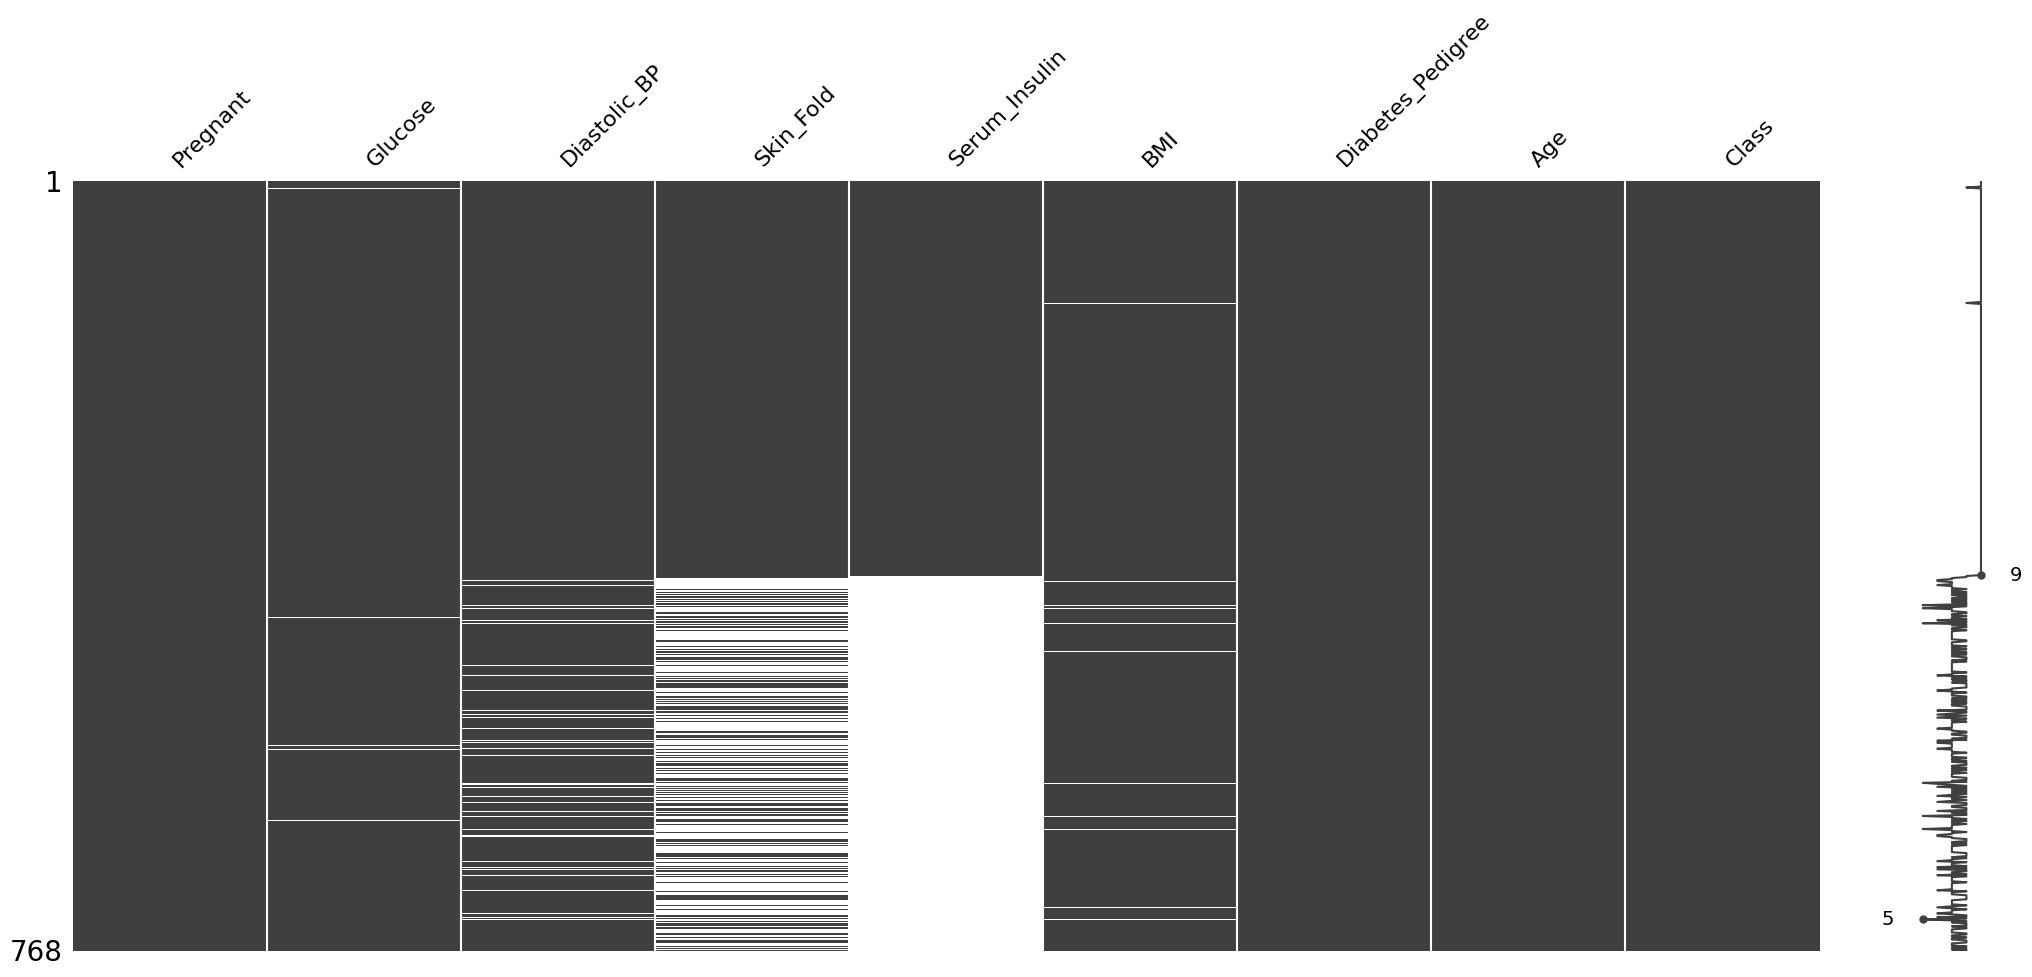

In [7]:
msno.matrix(diabetes_sorted)

## Finding patterns in your data

The two fastest methods to analyze the relations between missingness in the data are:

* Heatmaps or Correlation maps
* Dendrograms

### Heatmaps

* Graph of correlation of missing values between columns
* Explains the dependencies of missingness between columns

The columns where the missing values co-occur the most are highly related and vice-versa.

<Axes: >

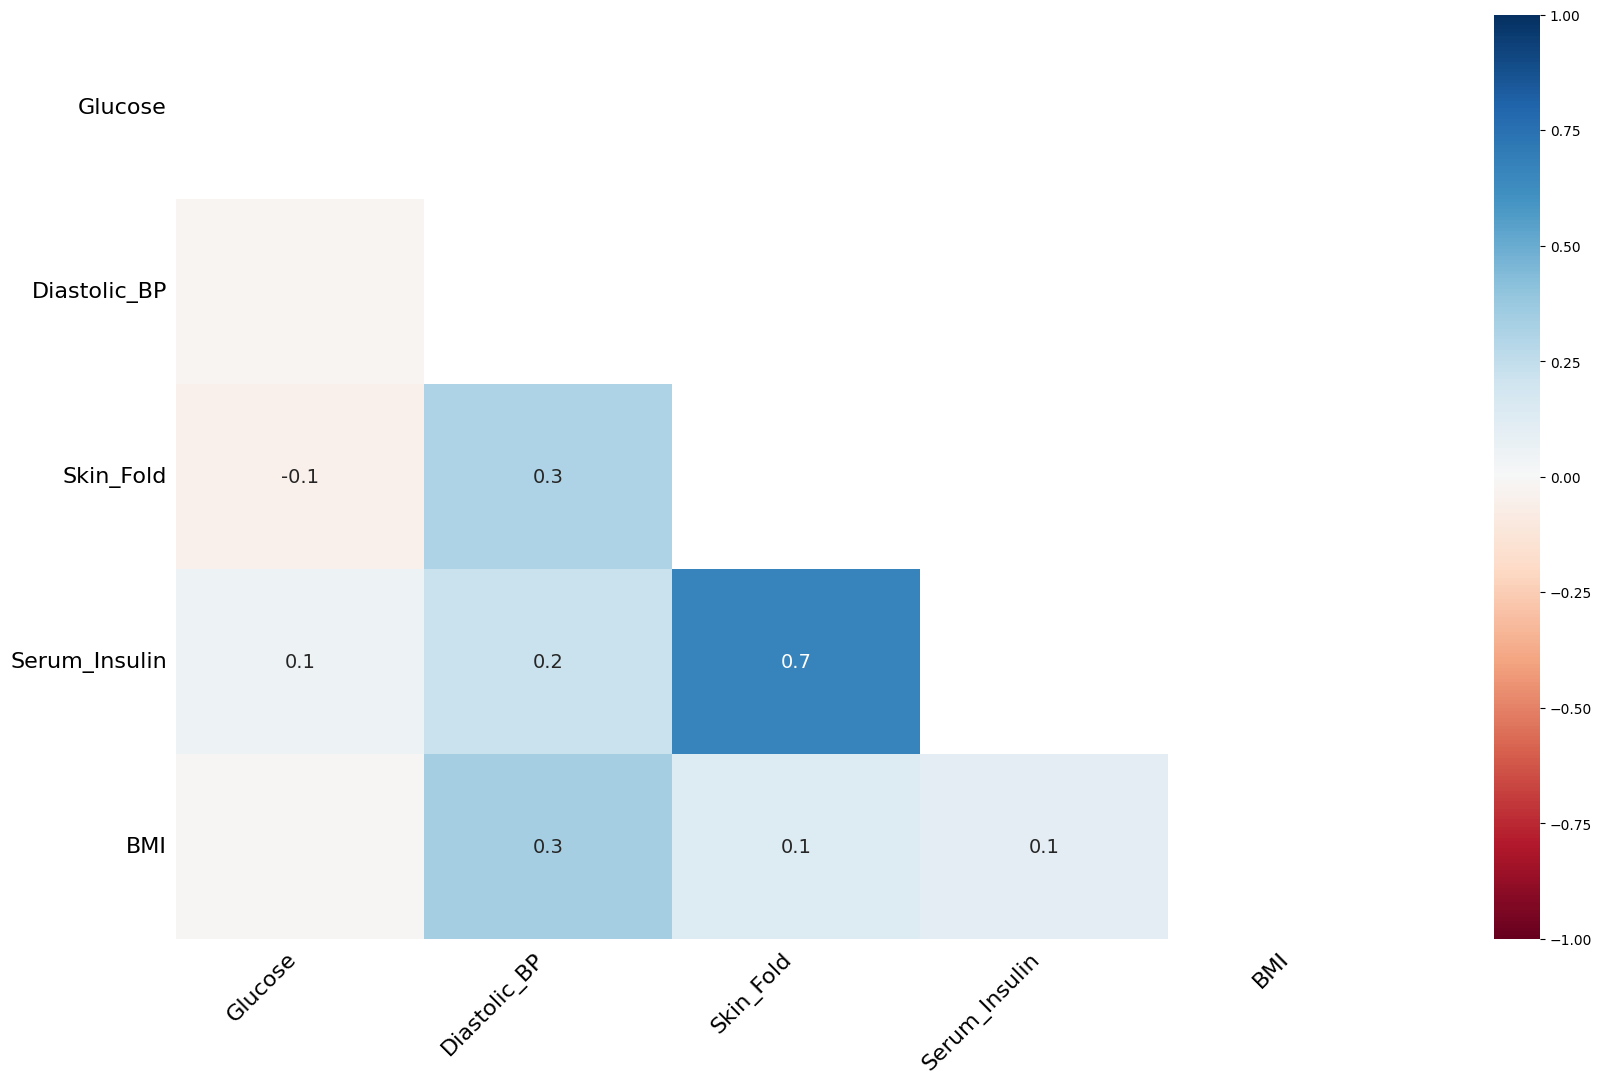

In [8]:
msno.heatmap(diabetes)

The redder the color, the lower the correlation. The bluer, the higher.

Here we see a strong correlation between `Skin_Fold` and `Serum_Insulin`. `Skin_Fold` and `BMI` have the least correlation.

### Missingness Dendrogram

* Tree diagram of missingness that groups similar object in close branches.
* The missingness dendrogram describes the correlations in missingness by grouping similarly missing columns together.

<Axes: >

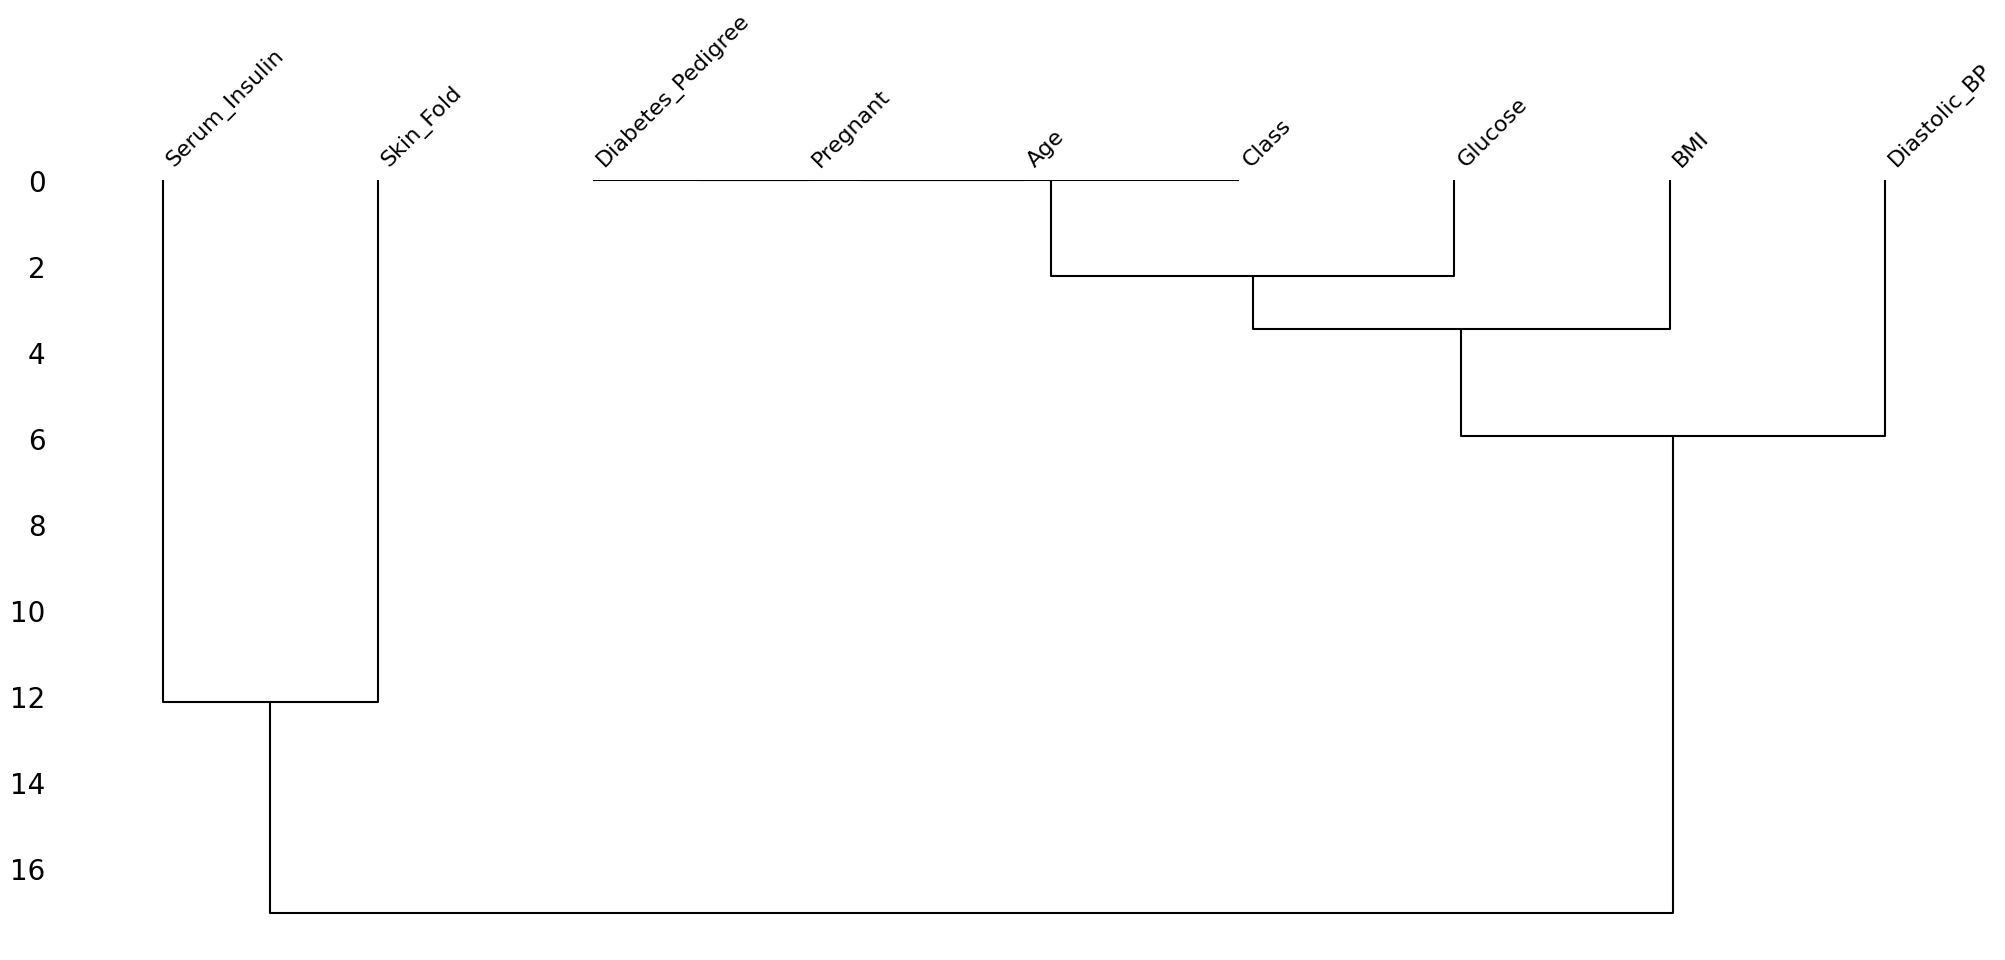

In [9]:
msno.dendrogram(diabetes)

To interpret the graph, read it top-down.

Clustered leaves which are linked together with a distance of zero (such as `Diabetes_Pedigree`, `Pregnant`, `Age`, and `Class`) fully predict one another's presence - one variable might always be empty while another is filled, or they might always both be filled, or both empty, and so on.

In this graph, `Serum_Insulin` and `Skin_Fold` are highly correlated (which we also saw in the heatmap) and can be called MNAR.

The missingmess of `Glucose` appears to be more similar to `BMI` than to `Diastolic_BP`. However, checking its matrix plot above, the number of values only confirms that their correlation is high only because both `BMI` and `Glucose` in particular have very few missing values. Hence, `Glucose` can as well be considered as MCAR.

#### Finding correlations in your data

Finding correlations between missing data helps you gain a deeper understanding of the type of missing data as well as provides suitable ways in which the missing values can be addressed. In the last video exercise, you learned two important techniques for visually detecting correlation between missing data: heatmaps and dendrograms.

In this exercise, you'll create a missingness heatmap and dendrogram for the `diabetes` dataset using the `missingno` package. It has been imported as `msno`.

##### Instructions 1/2

* Create a missingness heatmap for the `diabetes` DataFrame.


<Axes: >

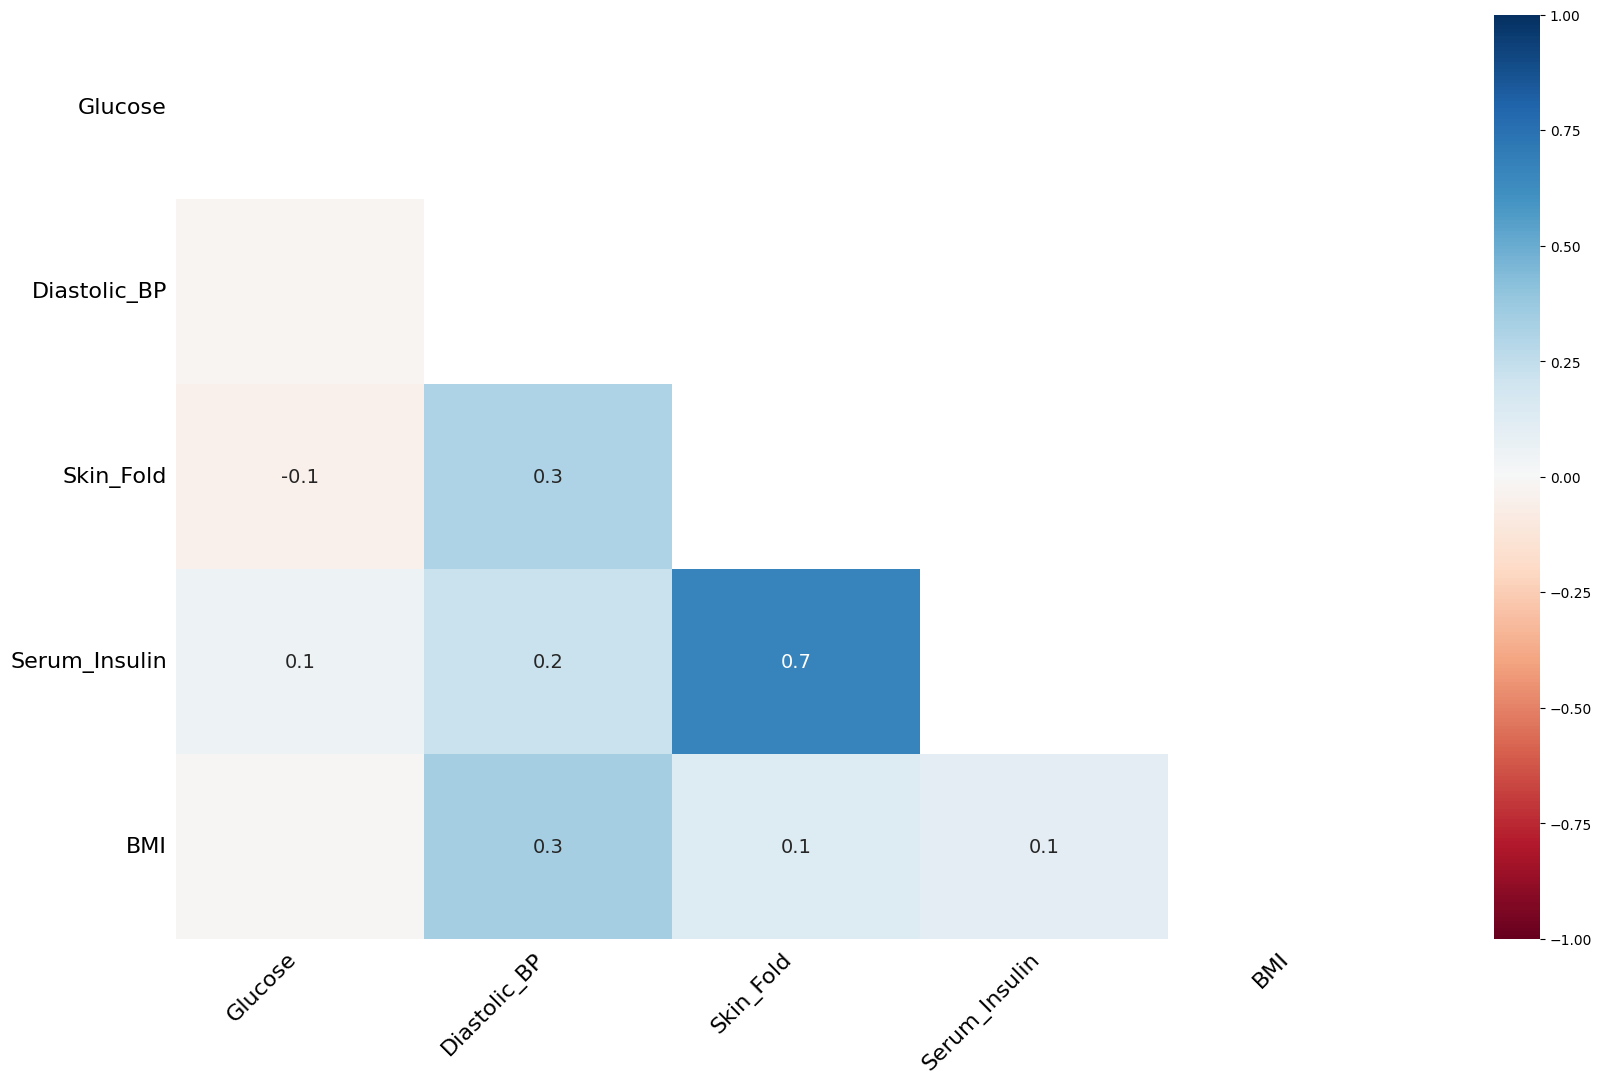

In [10]:
msno.heatmap(diabetes)

##### Instructions 2/2

* Create a missingness dendrogram for the `diabetes` DataFrame.

<Axes: >

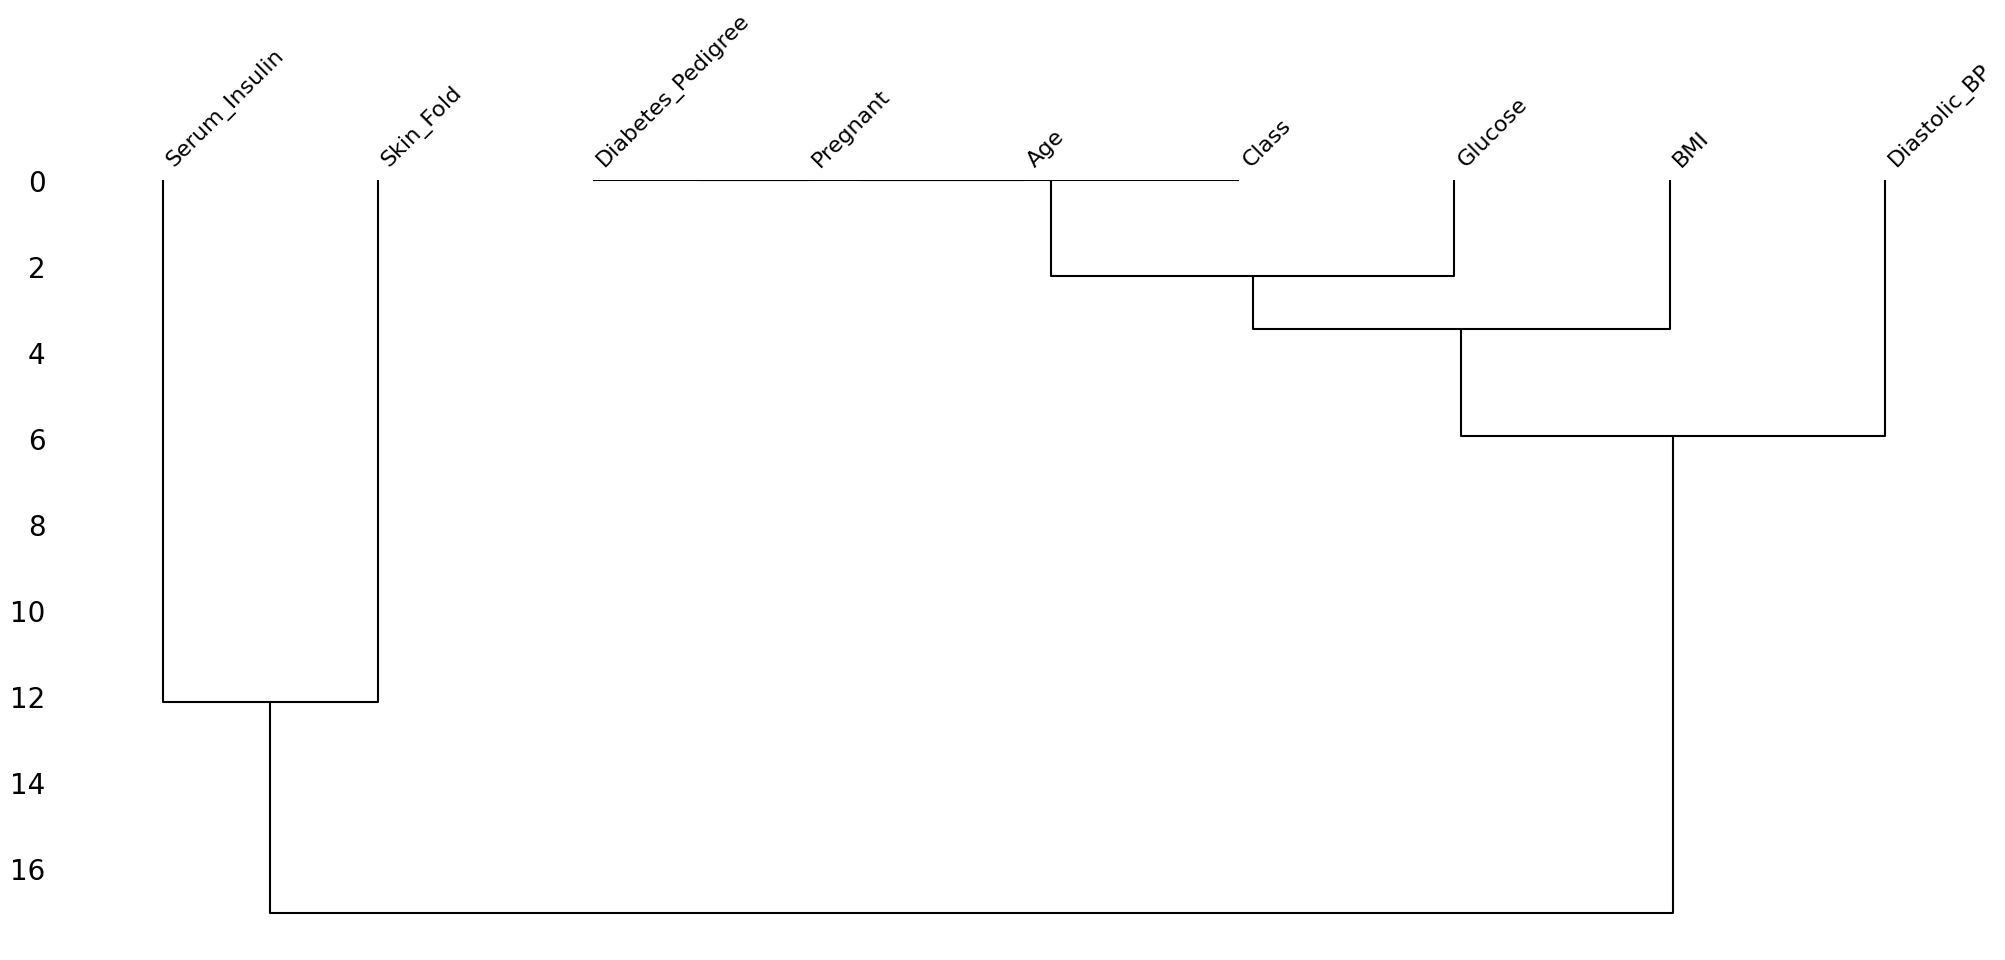

In [11]:
msno.dendrogram(diabetes)

#### Identify the missingness type

In this chapter, you've learned how to identify the missingness type using heatmaps, dendograms and matrices. You will now be tasked to use all these techniques to infer the type of missing values in the `diabetes` dataset.

Identify the missingness types of `Skin_Fold`. You can use the console for your experimentation and analysis. The `missingno` package has been imported for you as `msno`.

##### Instructions

**Possible answers**

1. Skin_Fold is MNAR
2. Skin_Fold is MAR
3. Skin_Fold is MCAR

**Answer**

1. Skin_Fold is MNAR

<Axes: >

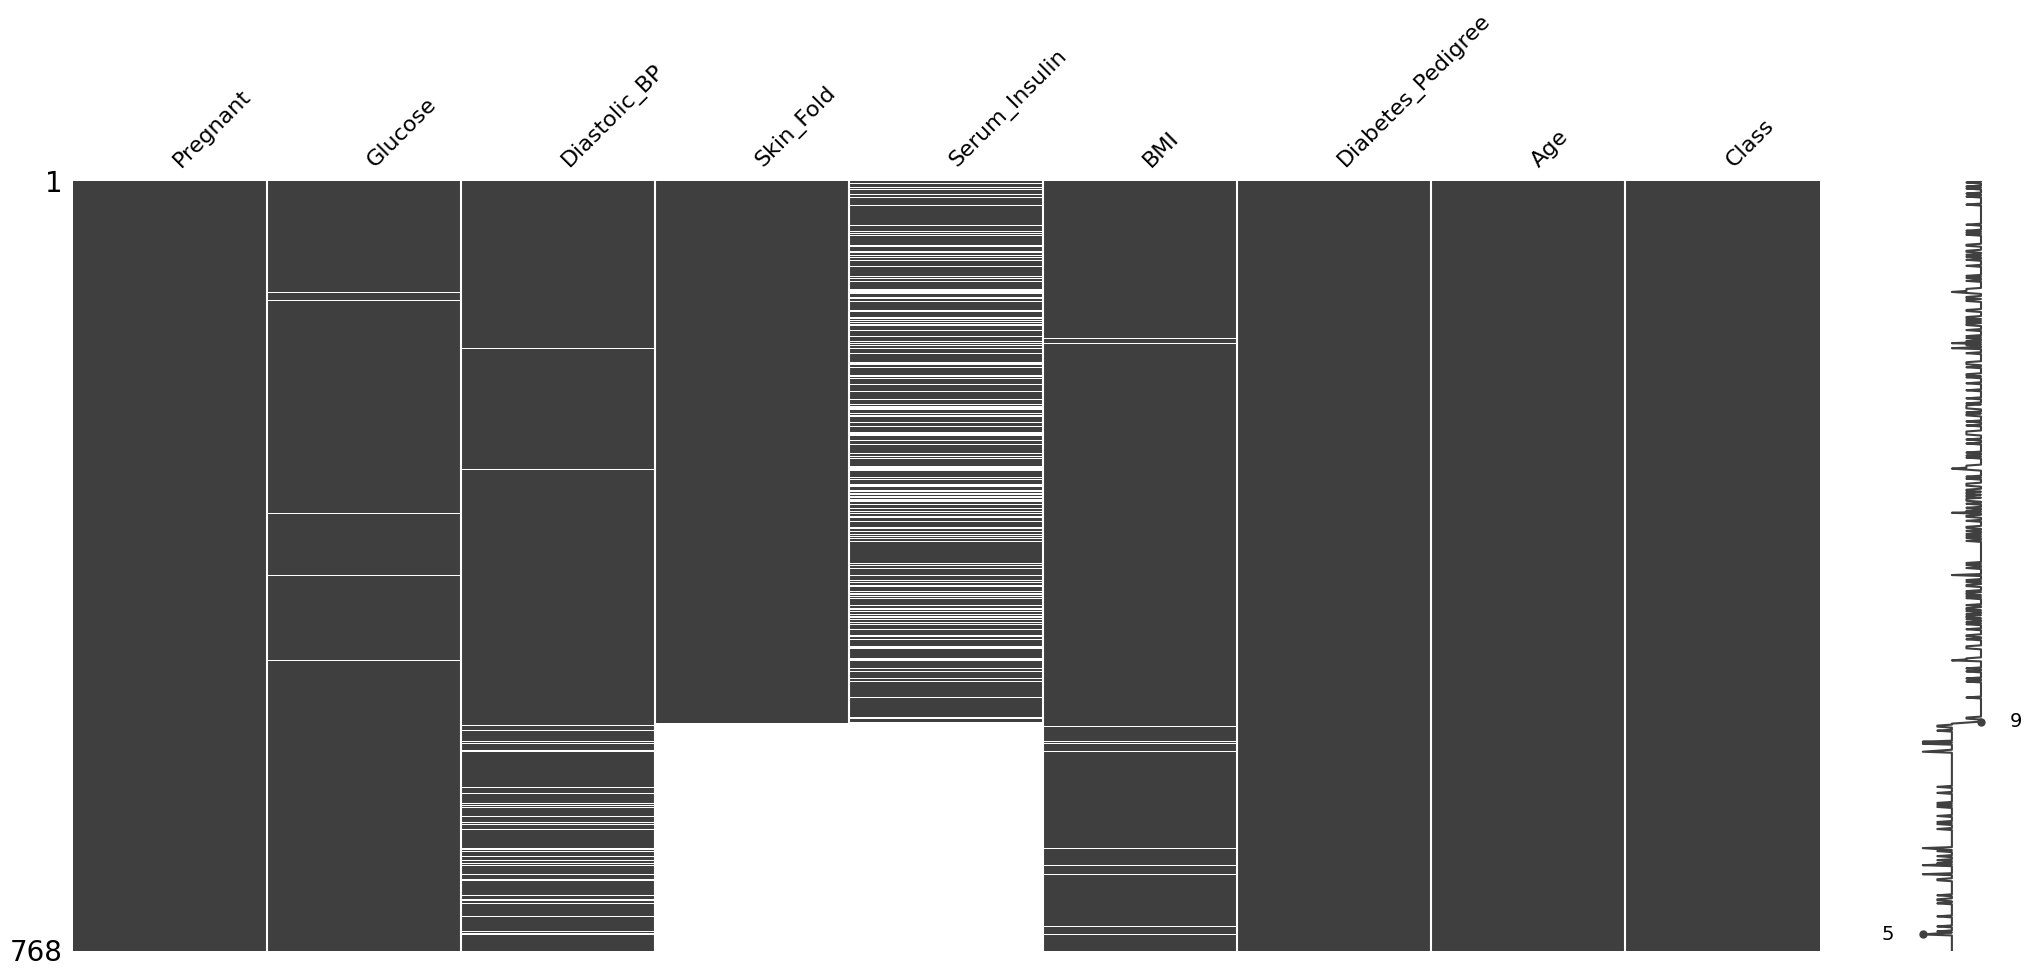

In [12]:
msno.matrix(diabetes.sort_values("Skin_Fold"))

## Visualizing missingness across a variable

* Visualize how missingness of a variable changes against another variable

![Alt text](images/bmi_vs_serum_insulin.png)

The scatterplot of `Serum_Insulin` and `BMI` illustrated above shows the non-missing values in purple and the missing values in red.

![Alt text](images/bmi_vs_serum_insulin_missing_si.png)

The red points along the y-axis are the missing values of 'Serum_Insulin' plotted against their 'BMI' values. 

![Alt text](images/bmi_vs_serum_insulin_missing_bmi.png)

Likewise, the points along the x-axis are the missing values of 'BMI' against their 'Serum_Insulin' values. 

![Alt text](images/bmi_vs_serum_insulin_missing_both.png)

The bottom-left corner represents the missing values of both 'BMI' and 'Serum_Insulin'. 

We see that the missing values of `Serum_Insulin` are spread throughout the `BMI` column. Thus, we do not observe any specific correlation between the missingness of `Serum_Insulin` and `BMI`.

To create this graph, we will use the `matplotlib` library. However, `matplotlib` skips all missing values while plotting. Therefore, we would need to first create a function that fills in dummy values for all the missing values in the DataFrame before plotting. 

### Filling dummy values

In [13]:
BMI_null = diabetes["BMI"].isnull()
num_nulls = BMI_null.sum()  # how many random numbers we need

dummy_values = rand(num_nulls)

`rand()` returns a number between 0 and 1.

`BMI` and `Skin_Fold`, however, have values in the 100's and 1000's. Therefore, we'll need to scale and shift the generated dummy values.

In [14]:
# shift to between -2 and -1
dummy_values = dummy_values - 2

# scale to 0.075 of column range
bmi_range = diabetes["BMI"].max() - diabetes["BMI"].min()
dummy_values - dummy_values * 0.075 * bmi_range

array([3.55934085, 3.45704198, 4.43851501, 3.14720878, 3.51567154,
       5.33080379, 5.31131088, 4.40894694, 3.76251506, 2.87982008,
       4.77199829])

![Alt text](images/bmi_serum_insulin_range.png)

The number 0.075 was chosen after experimenting with various values between 0 and 1. 

In [15]:
# scale and shift one-shot
dummy_values = (rand(num_nulls) - 2) * 0.075 * bmi_range + diabetes["BMI"].min()

Create the function, `fill_dummy-values()`, that will fill in values in the dataframe.

In [16]:
def fill_dummy_values(df: pd.DataFrame, scaling_factor: float) -> pd.DataFrame:
    """Fill missing values in df with scaled dummy values."""
    # operate on a copy of df so we have the option to leave the original untouched
    df_dummy = df.copy(deep=True)

    for col_name in df_dummy.columns:
        col = df_dummy[col_name]
        null_indices: pd.Index = col.index[col.isnull()]
        num_nulls: int = len(null_indices)
        col_range: float = col.max() - col.min()

        if num_nulls > 0:
            dummy_values = (rand(num_nulls) - 2) * scaling_factor * col_range + col.min()

            # use .loc to assign values to the original df, not a view as
            # df_dummy[null_cols] does
            df_dummy.loc[null_indices, col_name] = dummy_values

    return df_dummy

<Axes: xlabel='Serum_Insulin', ylabel='BMI'>

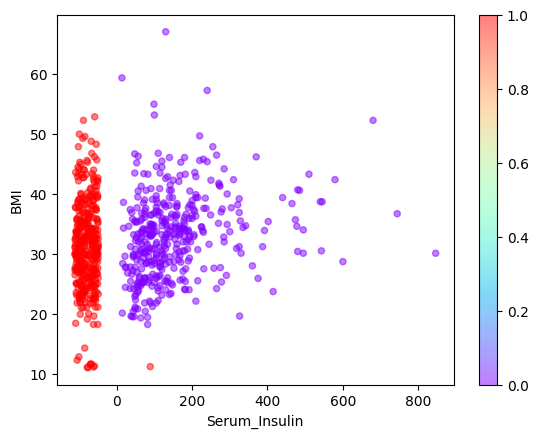

In [17]:
diabetes_dummy = fill_dummy_values(diabetes, scaling_factor=0.075)

nullity = diabetes["Serum_Insulin"].isnull() | diabetes["BMI"].isnull()

diabetes_dummy.plot(x="Serum_Insulin", y="BMI", kind="scatter", alpha=0.5, c=nullity, cmap="rainbow")

#### Fill dummy values

Similar to how you tried to find any relation of missing to missing values between columns, it is also important to find any relation of missing to non-missing values between columns. *This will help you realize any **factors for missingness in the data.***

![Alt text](images/fill_dummy_values.png)

BMI vs Serum Insulin

In the above figure, you can observe that the missing values of `Serum Insulin` are spread across the range of `BMI` values. This only implies that there is no relation!

In this exercise, you will **write a function to generate dummy values** to help create the above scatter plot (in the next exercise). The operations to generate dummy values involve scaling the random values to a column range with a scaling factor and shifting the values.

The function `rand()` has been imported for you from `numpy.random`.

##### Instructions 1/4

* Calculate the column range by subtracting maximum and minimum values of the column.


In [18]:
# # exercise version
# def fill_dummy_values(df):
#   df_dummy = df.copy(deep=True)
#   for col_name in df_dummy:
#     col = df_dummy[col_name]
#     # Calculate column range
#     col_range = col.max() - col.min()
#   return df_dummy

# my version
def fill_dummy_values(df: pd.DataFrame, scaling_factor: float = 0.075) -> pd.DataFrame:
    """Fill missing values in df with scaled dummy values."""
    df_dummy = df.copy(deep=True)

    for col_name in df_dummy.columns:
        col = df_dummy[col_name]
        col_range: float = col.max() - col.min()

    return df_dummy

##### Instructions 2/4

* Calculate the number of missing values in each column of the dummy DataFrame.

In [19]:
# # exercise version
# def fill_dummy_values(df):
#   df_dummy = df.copy(deep=True)
#   for col_name in df_dummy:
#     col = df_dummy[col_name]
#     # Calculate column range
#     col_range = col.max() - col.min()
#     # Calculate the number of missing values in column
#     col_null = col.isnull()
#     num_nulls = col_null.sum()
#   return df_dummy


# my version
def fill_dummy_values(df: pd.DataFrame, scaling_factor: float = 0.075) -> pd.DataFrame:
    """Fill missing values in df with scaled dummy values."""
    df_dummy = df.copy(deep=True)

    for col_name in df_dummy.columns:
        col = df_dummy[col_name]
        null_indices: pd.Index = col.index[col.isnull()]
        num_nulls: int = len(null_indices)
        col_range: float = col.max() - col.min()

    return df_dummy

##### Instructions 3/4

* Create random values of size `num_nulls`.

In [20]:
# # exercise version
# def fill_dummy_values(df):
#   df_dummy = df.copy(deep=True)
#   for col_name in df_dummy:
#     col = df_dummy[col_name]
#     # Calculate column range
#     col_range = col.max() - col.min()
#     # Calculate number of missing values in column
#     col_null = col.isnull()
#     num_nulls = col_null.sum()
#     # Create random values of size num_nulls
#     dummy_values = (rand(num_nulls) - 2)
#   return df_dummy


# my version
def fill_dummy_values(df: pd.DataFrame, scaling_factor: float = 0.075) -> pd.DataFrame:
    """Fill missing values in df with scaled dummy values."""
    df_dummy = df.copy(deep=True)

    for col_name in df_dummy.columns:
        col = df_dummy[col_name]
        null_indices: pd.Index = col.index[col.isnull()]
        num_nulls: int = len(null_indices)
        col_range: float = col.max() - col.min()
        dummy_values = rand(num_nulls) - 2

    return df_dummy

##### Instructions 4/4

* In your function definition, set the default value of `scaling_factor` to be `0.075`
* Next, scale your dummy values by `scaling_factor` and multiply them by `col_range`. *The minimum `col.min()` has been already added for you.*

In [21]:
# # exercise version
# def fill_dummy_values(df, scaling_factor=0.075):
#   df_dummy = df.copy(deep=True)
#   for col_name in df_dummy:
#     col = df_dummy[col_name]
#     # Calculate column range
#     col_range = col.max() - col.min()
#     # Calculate number of missing values in column
#     col_null = col.isnull()
#     num_nulls = col_null.sum()
#     # Scale the random values to scaling_factor times col_range
#     dummy_values = (rand(num_nulls) - 2) * scaling_factor * col_range + col.min()
#     col[col_null] = dummy_values
#   return df_dummy

# my version
def fill_dummy_values(df: pd.DataFrame, scaling_factor: float = 0.075) -> pd.DataFrame:
    """Fill missing values in df with scaled dummy values."""
    df_dummy = df.copy(deep=True)

    for col_name in df_dummy.columns:
        col = df_dummy[col_name]
        null_indices: pd.Index = col.index[col.isnull()]
        num_nulls: int = len(null_indices)
        col_range: float = col.max() - col.min()

        if num_nulls > 0:
            dummy_values = (rand(num_nulls) - 2) * scaling_factor * col_range + col.min()

            # use .loc to assign values to the original df, not a view as
            # df_dummy[null_cols] does
            df_dummy.loc[null_indices, col_name] = dummy_values

    return df_dummy

#### Generate scatter plot with missingness

In this exercise you'll create a scatter plot consisting of both missing and non-missing values. You will utilize the function `fill_dummy_values()` which you created in the previous exercise for filling in dummy values in the DataFrame `diabetes_dummy`.

The nullity of a column is calculated using the `.isnull()` method. The nullity returns a Series (`pd.Series`) of `True` or `False`.

For setting different colors to the missing and non-missing values, you can simply combine the nullity using OR(`|`) operation on the columns that you are plotting, resulting in:

* `True` -> Either `col1` or `col2` or both values are missing.
* `False` -> Neither of `col1` and `col2` values are missing.

The DataFrame `diabetes` and the function `fill_dummy_values()` have been loaded for your usage.

##### Instructions

* Use OR operation to combine nullity of `Skin_Fold` and `BMI`.
* Fill dummy values in `diabetes_dummy` using the function `fill_dummy_values()`.
* Create a scatter plot of `'BMI'` versus `'Skin_Fold'`; note Y versus X implies Y-axis against X-axis or Y as a function of X.


<Axes: xlabel='Skin_Fold', ylabel='BMI'>

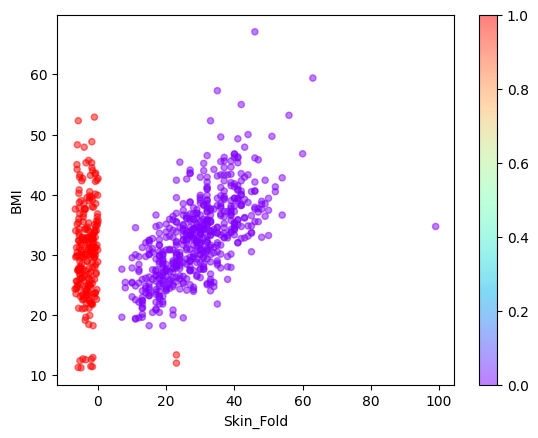

In [22]:
# # Use OR operation to combine Skin_Fold and BMI nullity
# nullity = diabetes["Skin_Fold"].isnull() | diabetes["BMI"].isnull()

# # Fill dummy values in diabetes_dummy
# diabetes_dummy = fill_dummy_values(diabetes)

# # Create a scatter plot of BMI versus Skin_Fold
# diabetes_dummy.plot(
#     x="Skin_Fold",
#     y="BMI",
#     kind="scatter",
#     alpha=0.5,
#     # Set color to nullity of BMI and Skin_Fold
#     c=nullity,
#     cmap="rainbow",
# )

# plt.show()

diabetes_dummy = fill_dummy_values(diabetes, scaling_factor=0.075)

nullity = diabetes["Skin_Fold"].isnull() | diabetes["BMI"].isnull()

diabetes_dummy.plot(x="Skin_Fold", y="BMI", kind="scatter", alpha=0.5, c=nullity, cmap="rainbow")

## When and how to delete missing data

### Types of deletions

1. pairwise deletion - missing values are skipped during calculations
1. listwise deletion - the *entire* row is deleted

**Note:** both of which are used *only* when values are MCAR.

### Pairwise deletion

All operations in `pandas` skip missing values which is equivalent to pairwise deletion.

```python
diabetes['Glucose'].mean()  # skip NaN values automatically
```

Pairwise deletion minimizes the amount of data loss and are preferred. However, they may negatively affect your analysis.

### Listwise deletion (or Complete Case Analysis)

The whole row is dropped.

```python
# delete any row where Glucose is missing
diabetes.dropna(subset=['Glucose'], how='any', inplace=True)
```

**The major disadvantage** of listwise deletion is loss of a lot of data.

<Axes: >

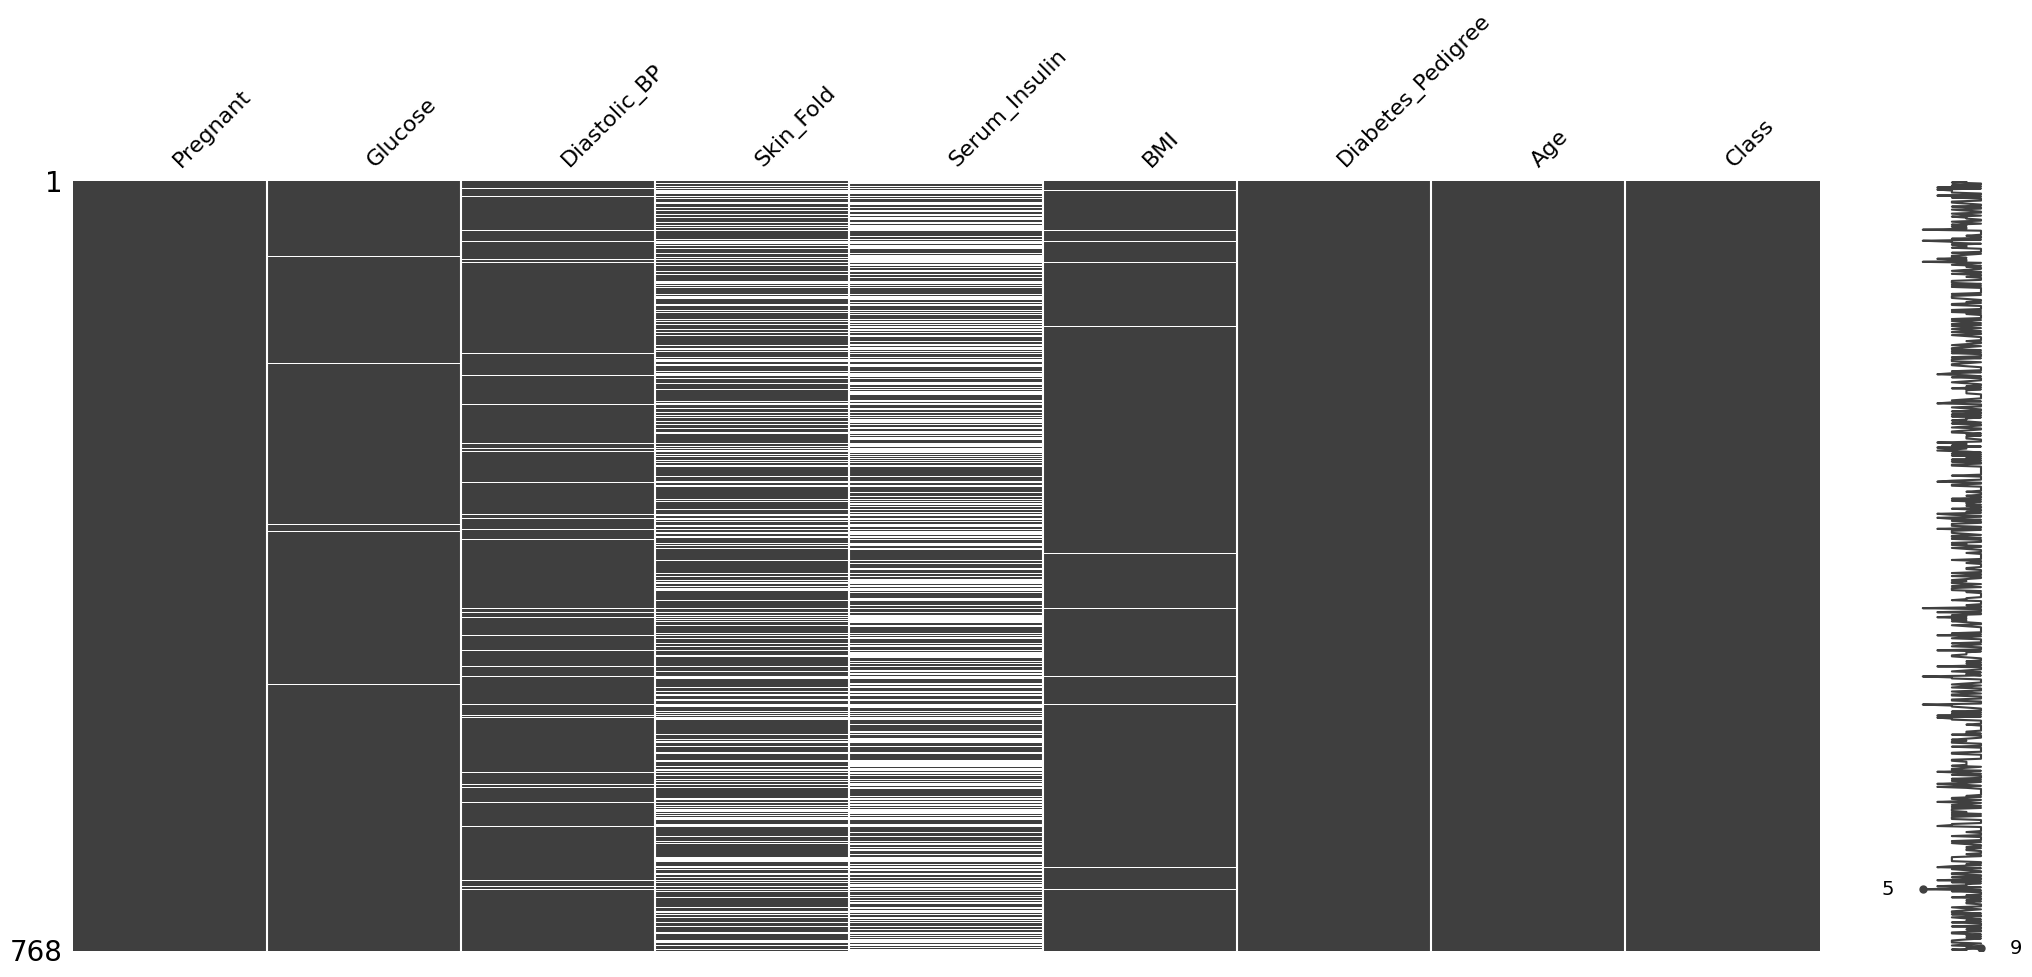

In [23]:
msno.matrix(diabetes)

Looking at `'Glucose'`, there are only 5 missing values confirming that data is MCAR so listwise deletion is okay.

In [24]:
diabetes.dropna(subset=["Glucose"], how="any", inplace=True)

<Axes: >

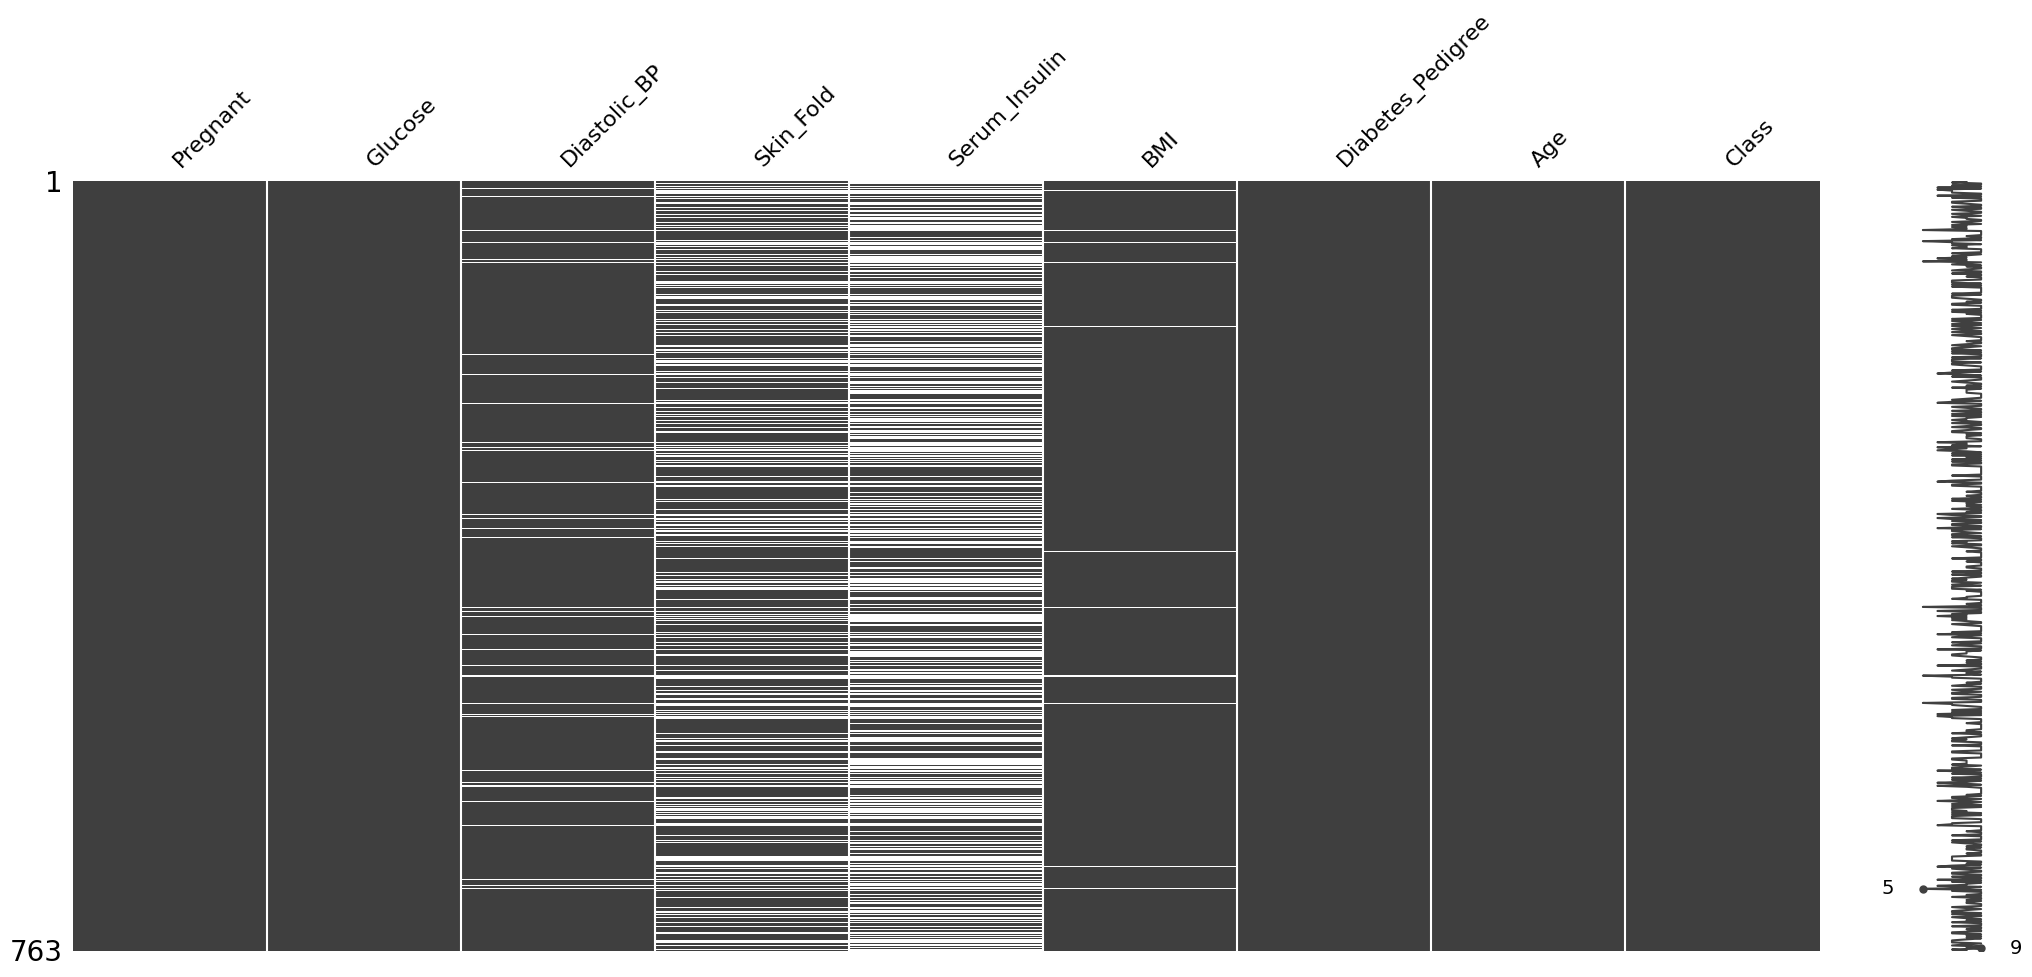

In [25]:
msno.matrix(diabetes)

#### Delete MCAR

Analyzing and appropriately treating missing values is a tricky job. However, dealing with them is very simple if the number of missing values is very small. In the video exercise, you learned how to properly identify, when to drop, and remove missing data.

In this exercise, you'll listwise delete the rows where the `Glucose` column has missing values. The `diabetes` DataFrame and the `missingno` package as `msno` has already been loaded for you.

##### Instructions 1/3

* Visualize the missingness matrix of `diabetes`.


<Axes: >

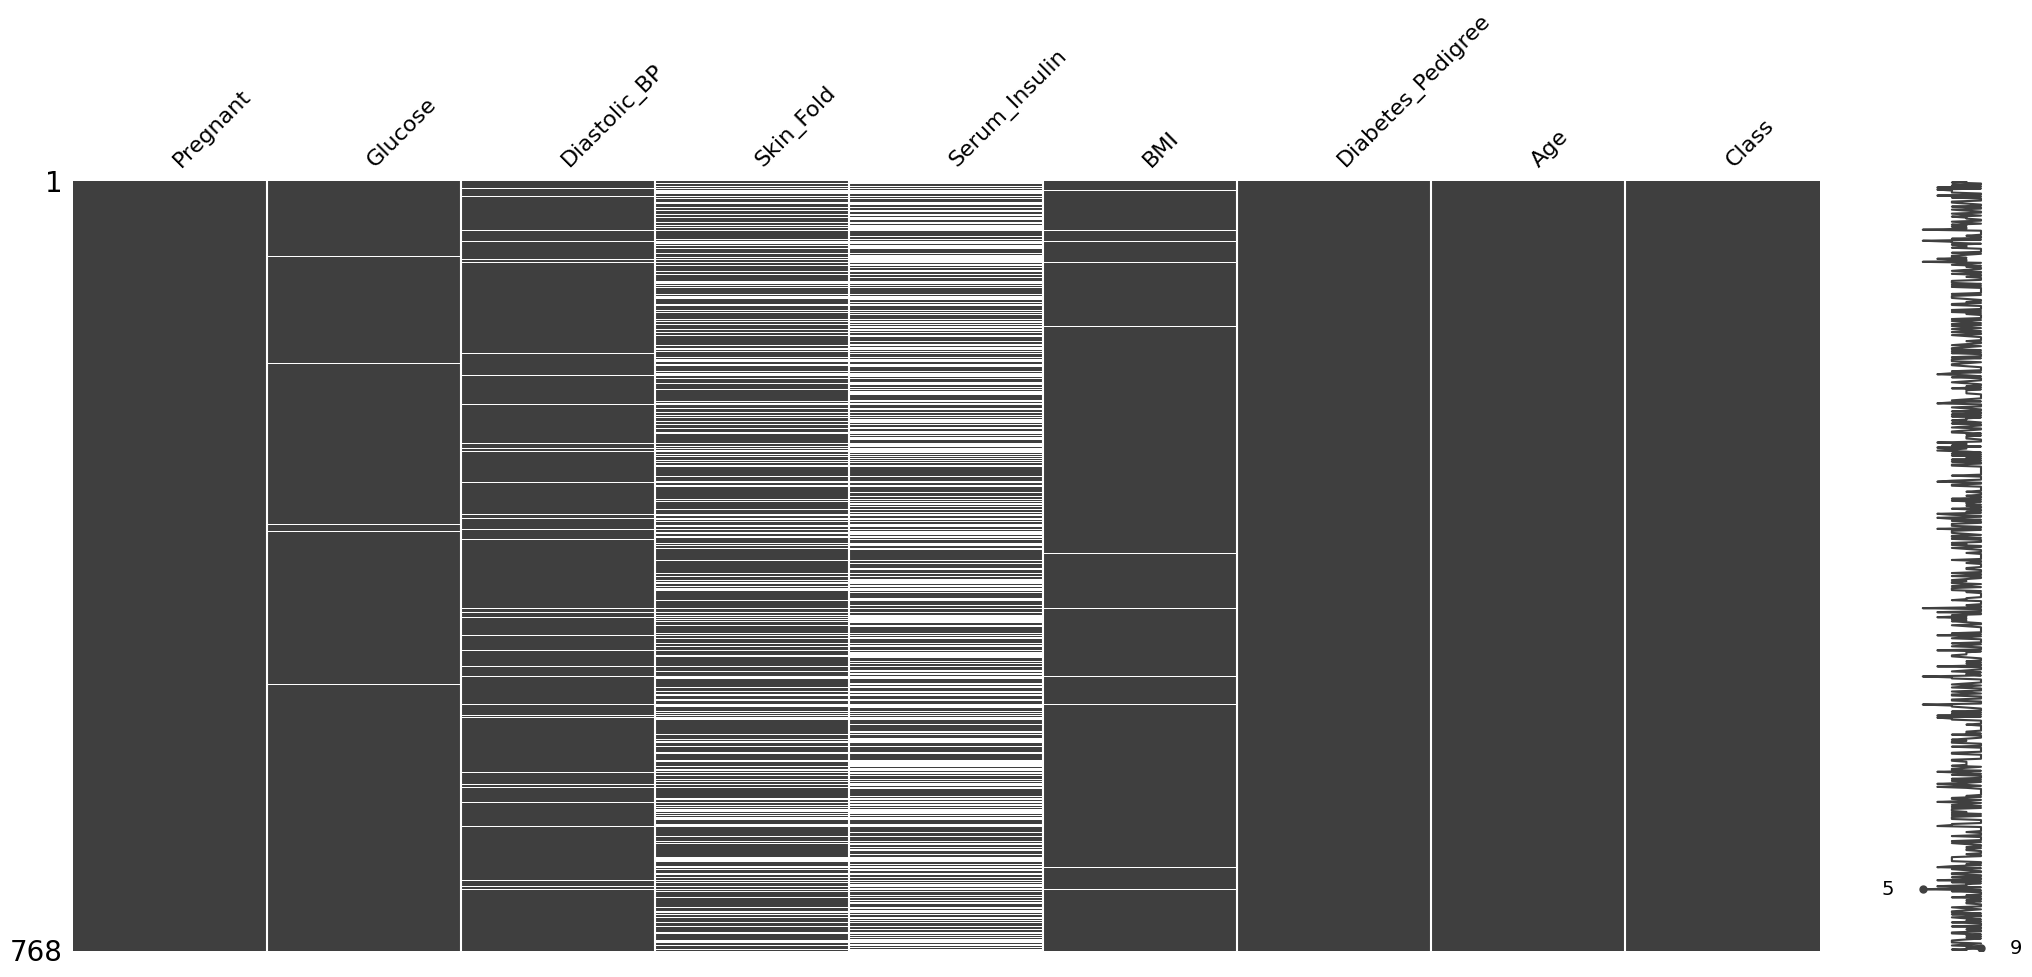

In [28]:
# reset the data set
diabetes = pd.read_csv("data/pima_indians_diabetes.csv")

# Visualize the missingness of diabetes prior to dropping missing values
msno.matrix(diabetes)

##### Instructions 2/3

* Print the number of missing values in `Glucose`.

In [31]:
diabetes.loc[:, "Glucose"].isna().sum()

5

##### Instructions 3/3

* Perform listwise deletion on the missing values of the `Glucose` column and visualize the nullity matrix.

<Axes: >

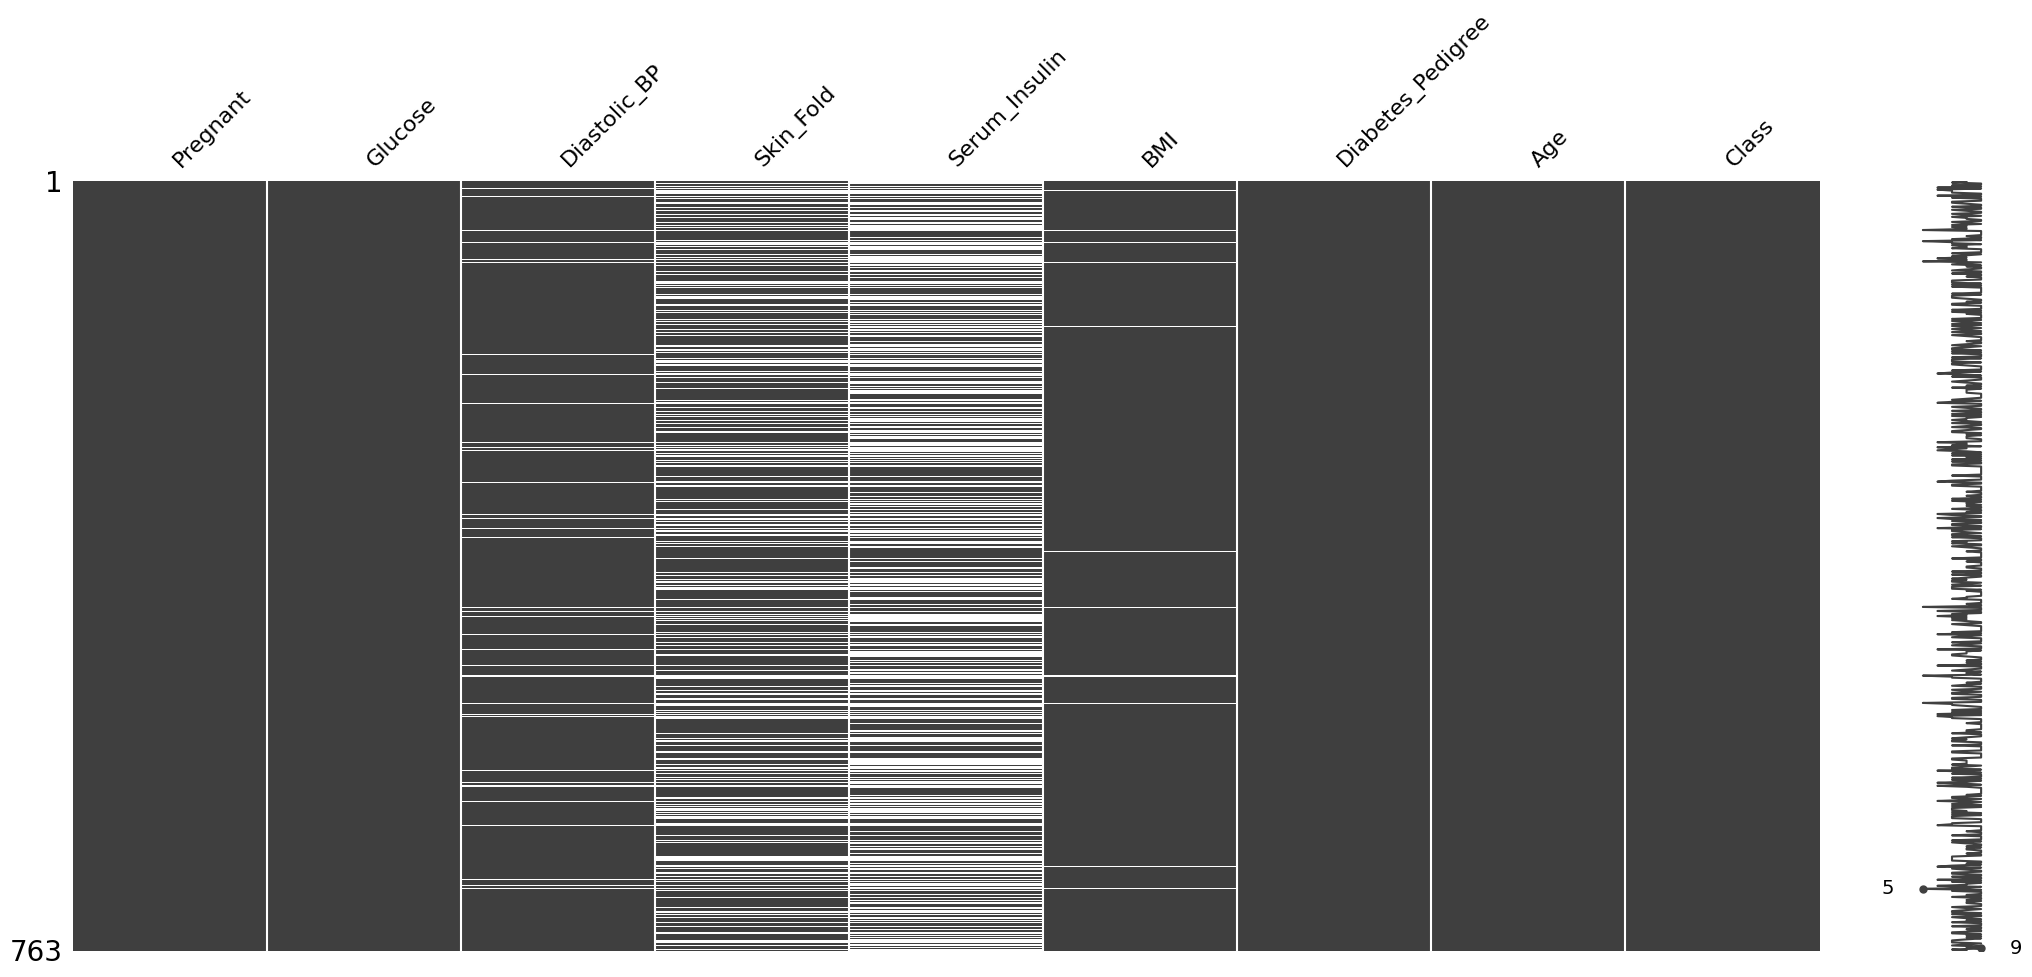

In [32]:
# Drop rows where 'Glucose' has a missing value
diabetes.dropna(subset=["Glucose"], how="any", inplace=True)

# Visualize the missingness of diabetes after dropping missing values
msno.matrix(diabetes)

#### Will you delete?

Before deleting missing values completely, you must consider the factors for deletion. The simplest factor to consider is the size of the missing data. More complex reasons affecting missingness may require domain knowledge. In this exercise, you will identify the reason for missingness and then perform the appropriate deletion.

You'll first use `msno.matrix()` and `msno.heatmap()` to visualize missingness and the correlation between variables with missing data. You will then determine pattern in missingness. Lastly, you'll delete depending on the type of missingness.

The `diabetes` DataFrame has been loaded for you.

Note that we've used a proprietary display() function instead of plt.show() to make it easier for you to view the output.

##### Instructions 1/4

* Visualize the missingness matrix of diabetes.


<Axes: >

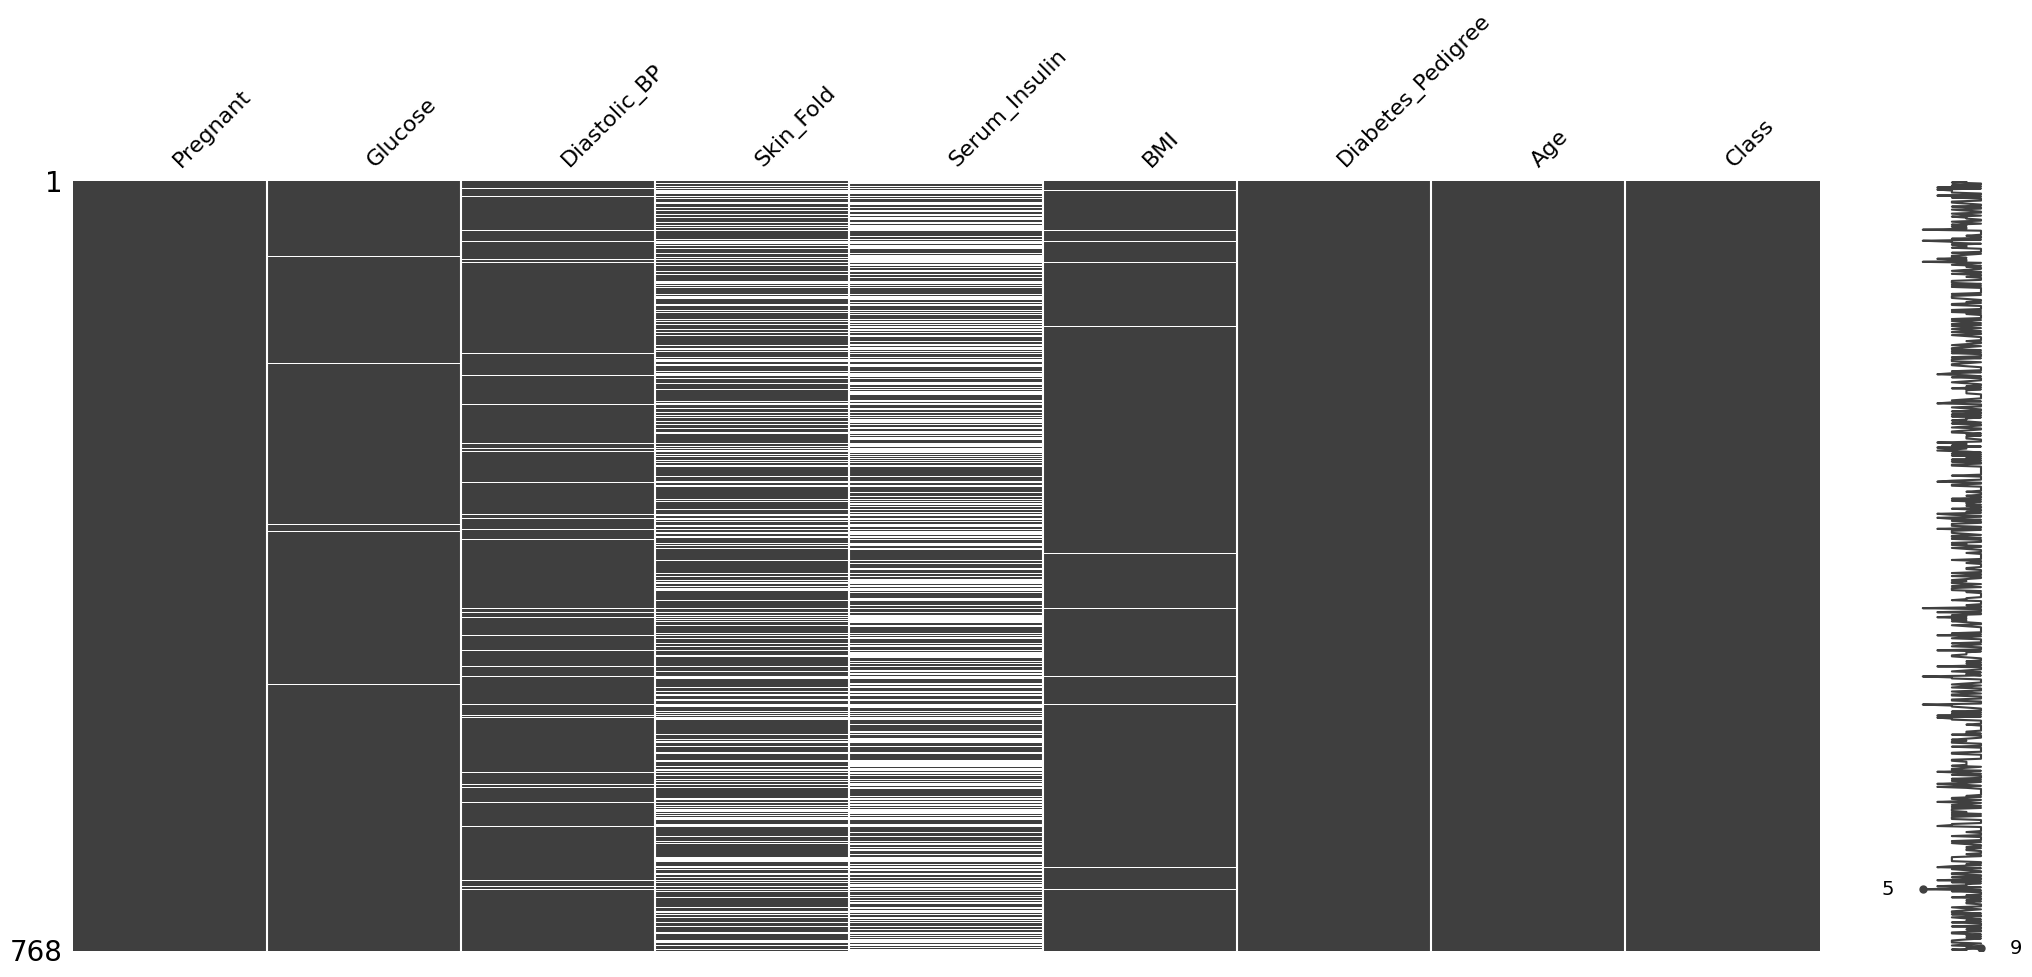

In [35]:
# reset the data set
diabetes = pd.read_csv("data/pima_indians_diabetes.csv")

msno.matrix(diabetes)

##### Instructions 2/4

* Visualize the missingness `heatmap` of diabetes.

In [37]:
diabetes.loc[:, "BMI"].isna().sum()

11

<Axes: >

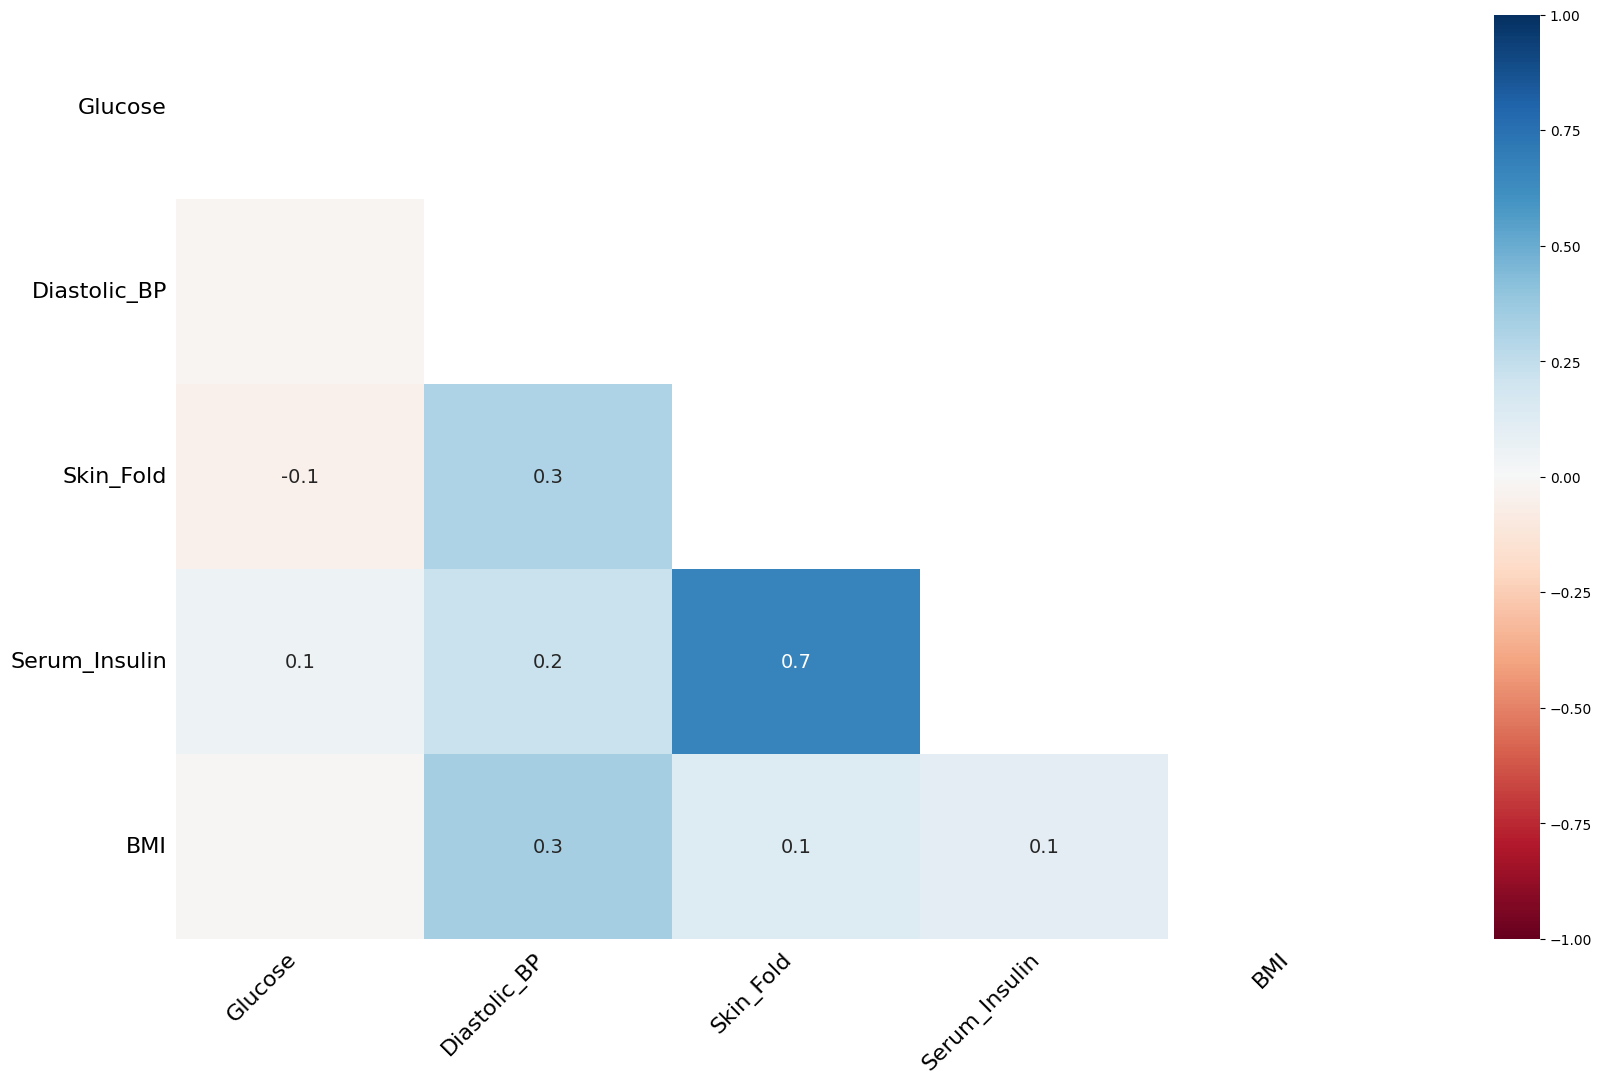

In [36]:
msno.heatmap(diabetes)

##### Instructions 3/4

**Question**

From the graphs that you just created, keenly observe the missingness of the variable `BMI` and select the best option you deem fit is the reason for missingness.

**Possible answers**

1. `BMI` values are Missing Completely at Random(MCAR). Therefore, we should delete it.
2. `BMI` values are Missing at Random(MAR). Therefore, we should delete it.
3. `BMI` values are Missing at Random(MAR). Therefore, we should not delete it.
4. `BMI` values are Missing Completely at Random(MCAR). Therefore, we should not delete it.

**Answer**

1. `BMI` values are Missing Completely at Random(MCAR). Therefore, we should delete it.

##### Instructions 4/4

* Drop the cases where BMI is missing.

<Axes: >

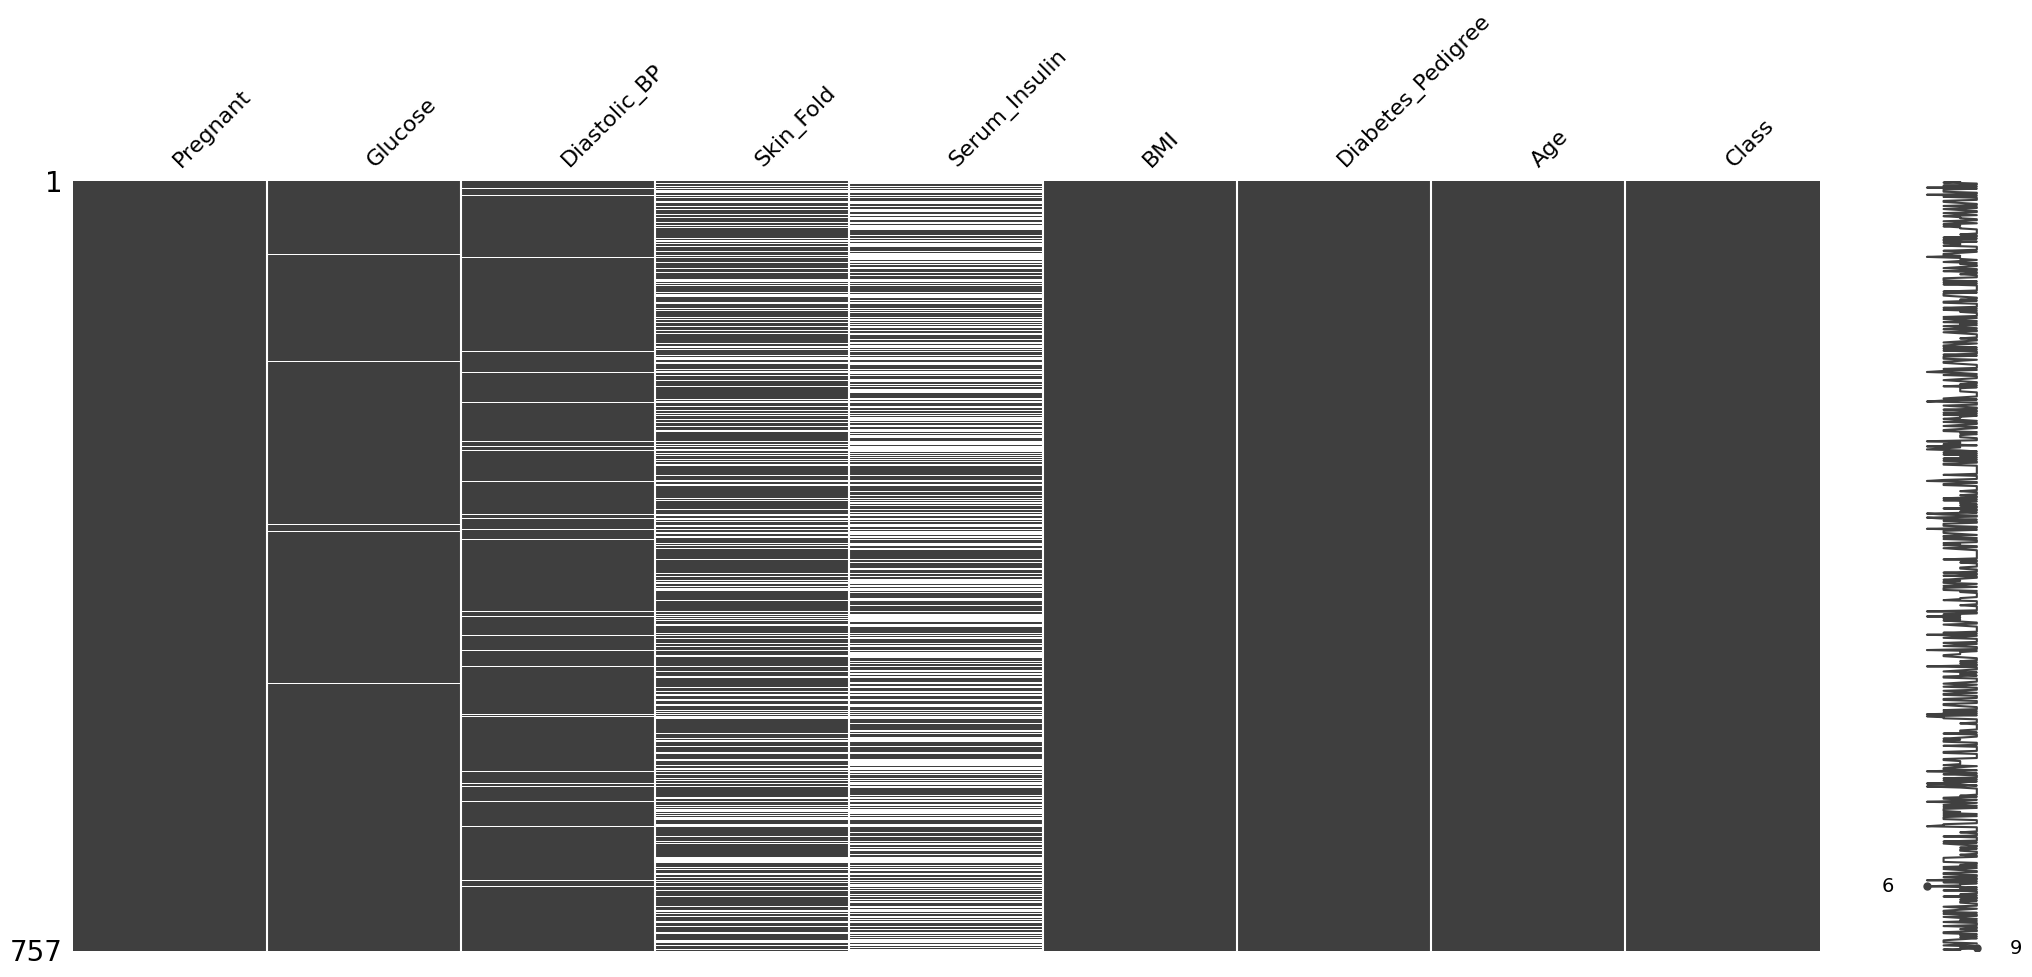

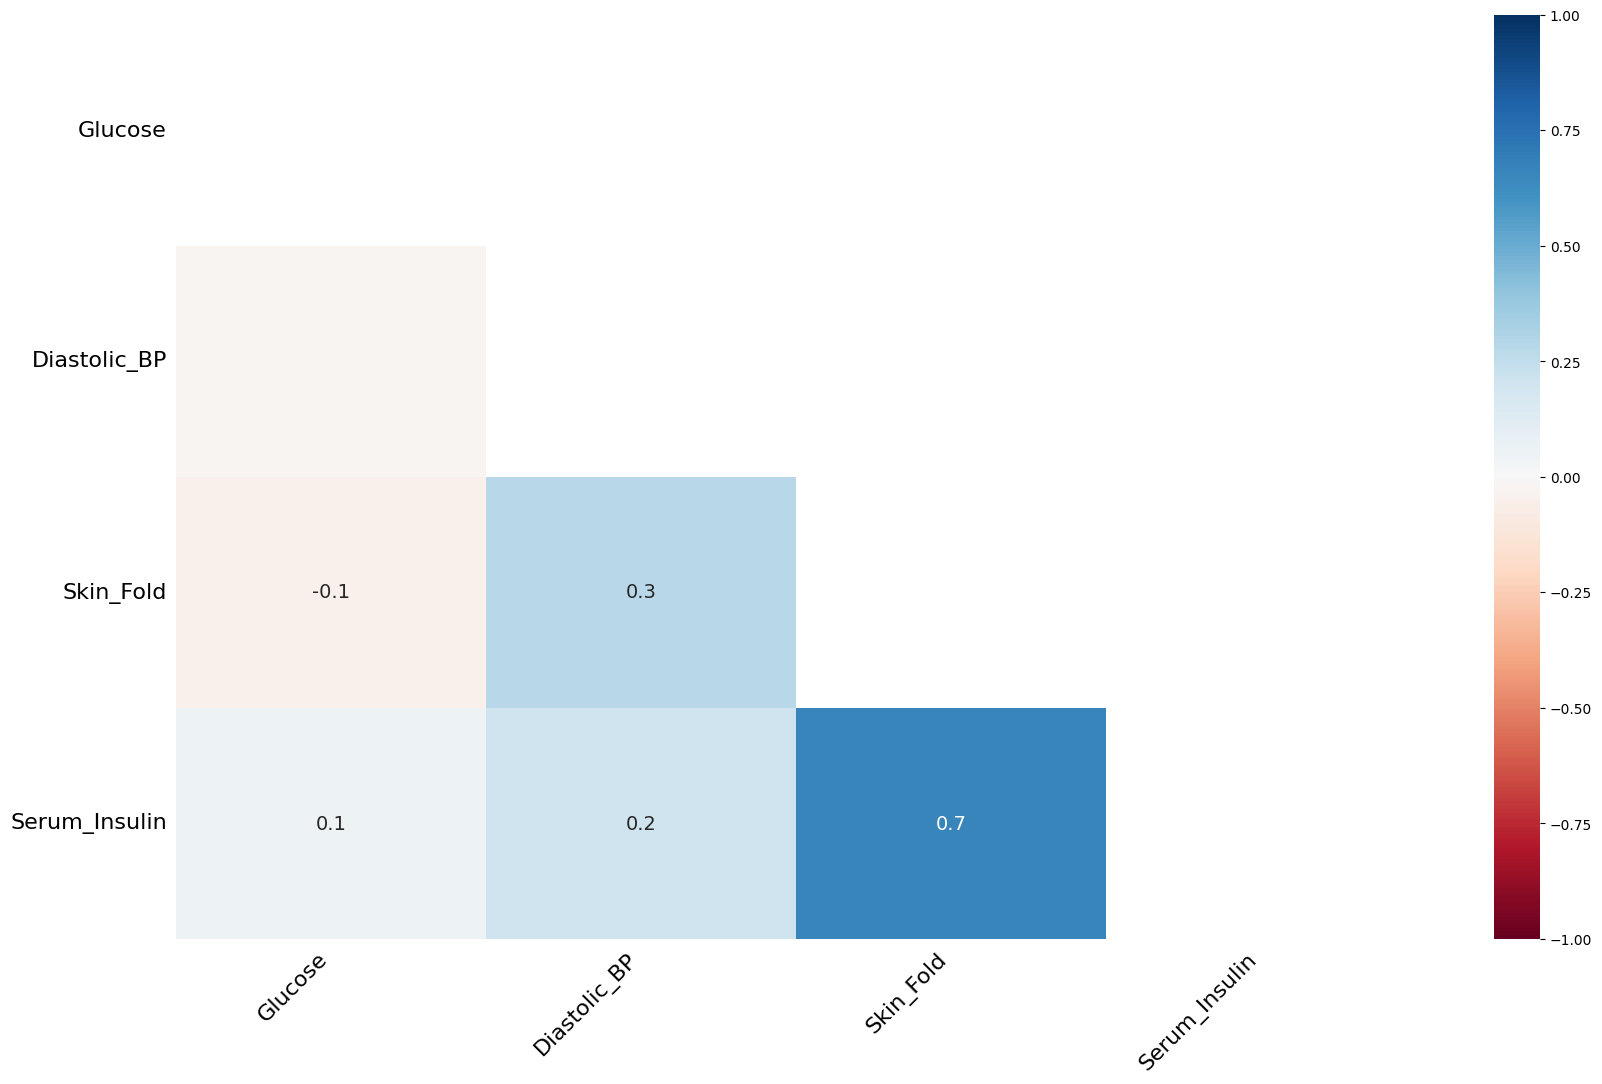

In [38]:
diabetes.dropna(subset=["BMI"], how="any", inplace=True)

msno.matrix(diabetes)
msno.heatmap(diabetes)

<Axes: >

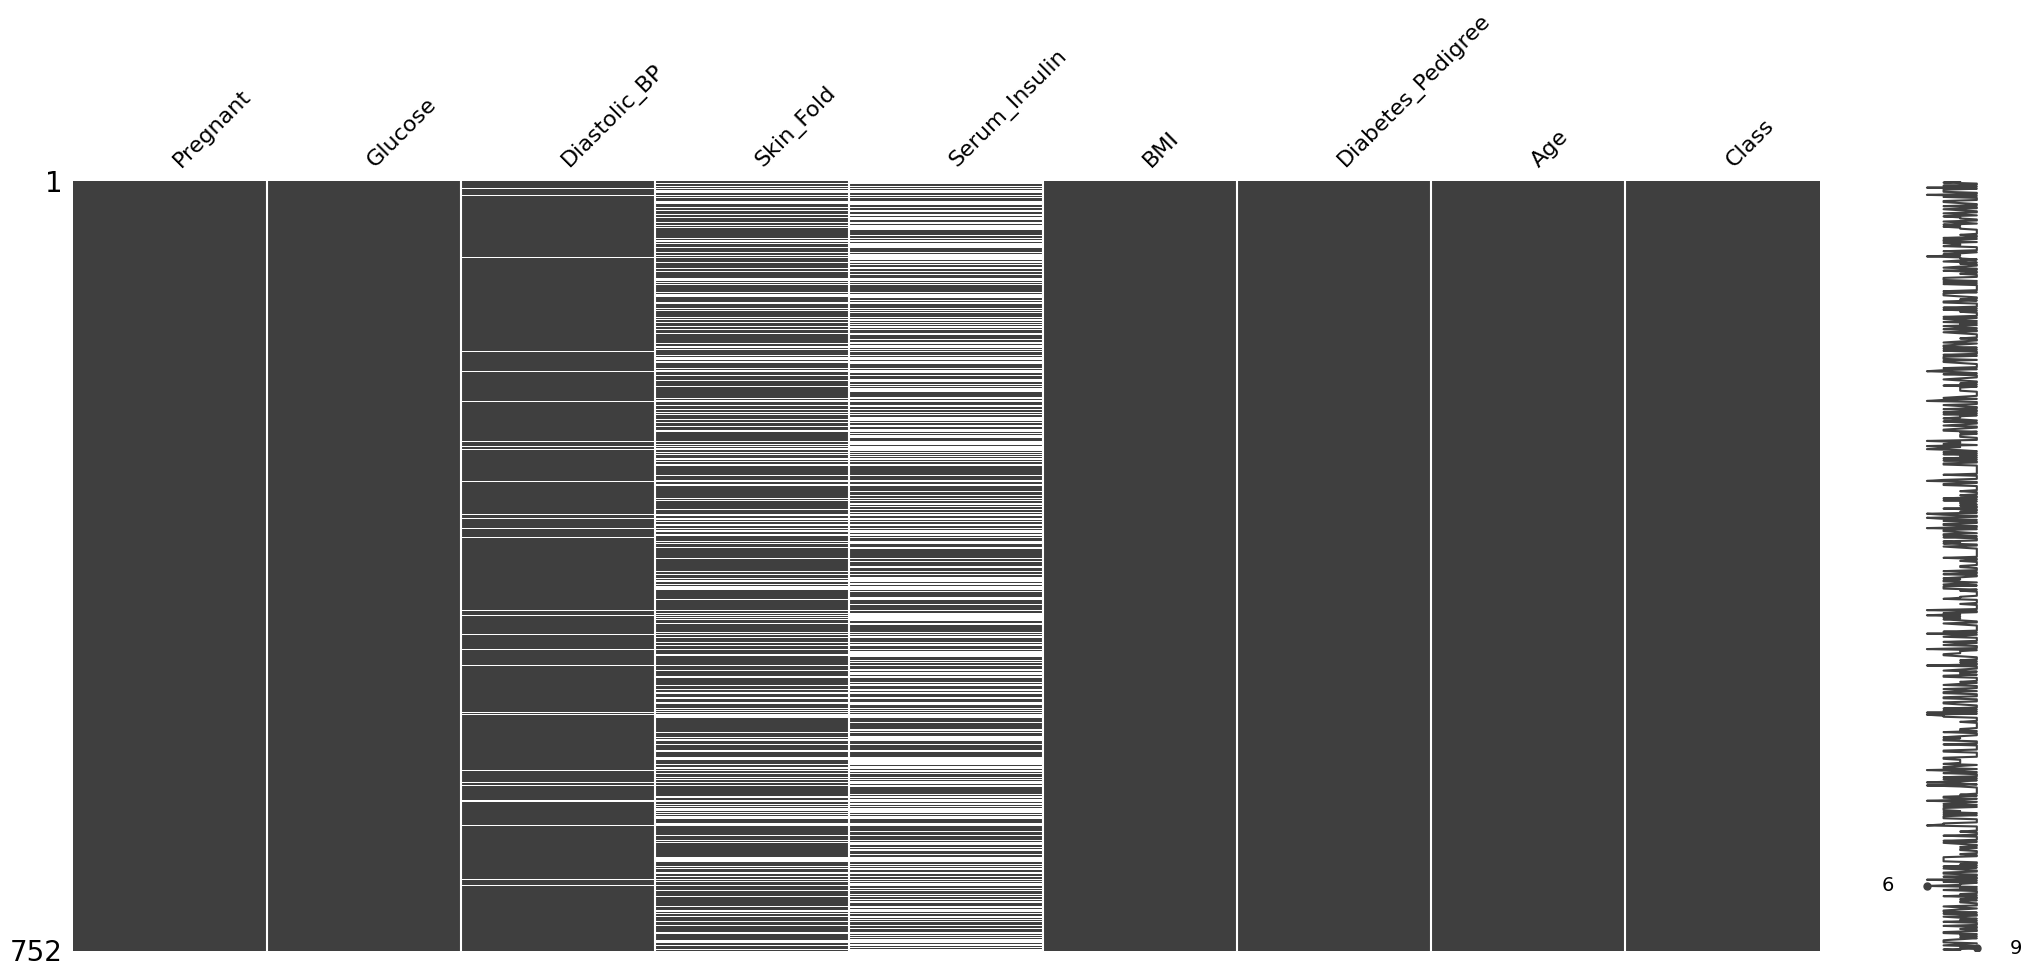

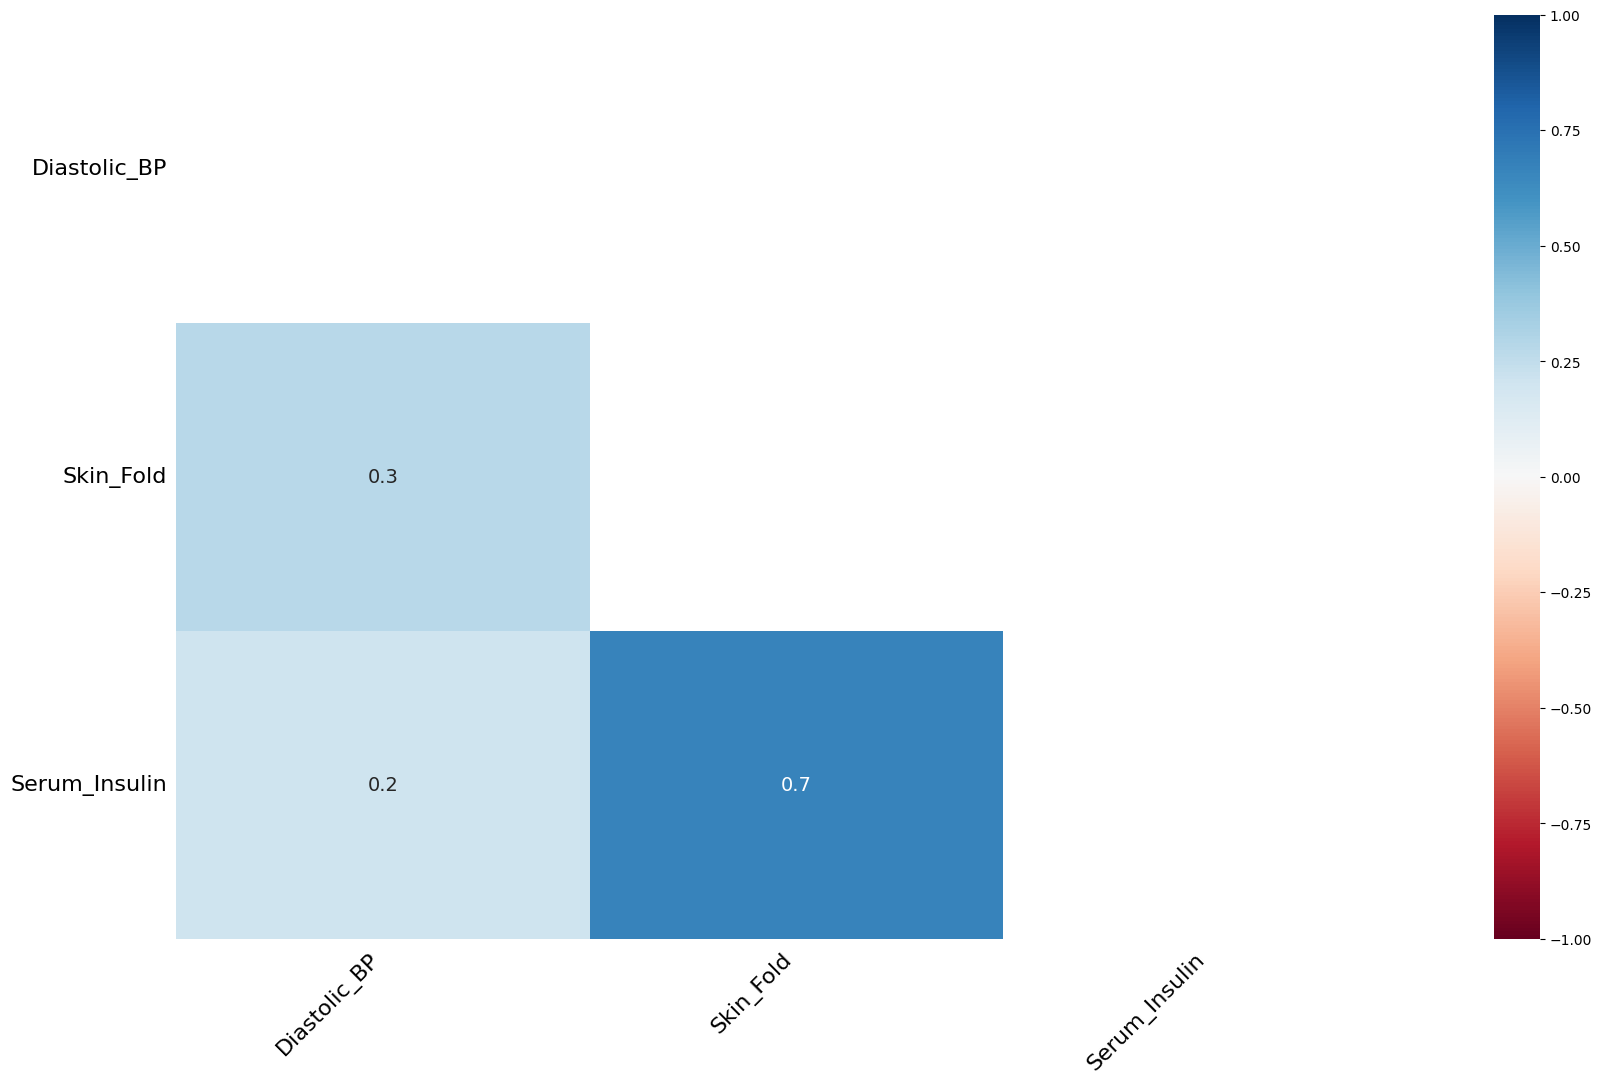

In [40]:
diabetes.dropna(subset=["Glucose"], how="any", inplace=True)
msno.matrix(diabetes)
msno.heatmap(diabetes)